# Machine Learning Assignment Report

This report presents analysis of two datasets. Exploratory analysis has been carriedout to understand data. Regression models, Classification  models and Artificial Neural Networks have been used to train models to predict the target variable values.

Student Name: Chanya Subasingha Arachchige<br> 


Student Code: S4107143<br> 


Module Title: CT7205 - Machine Learning and Optimization<br> 


Module Tutor: Dr. Bhupesh Mishra<br> 


School of Computing and Technology<br>


University of Gloucestershire<br> 


In [993]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')


## Question 1: Medical Insurance

### Introduction

The dataset contains data on medical costs and related variables. People around the world use medical insurance to cover their medical costs such as hospital visits, doctor appointments, and surgeries. Insurance companies calculate premiums depending on the analysis of the insured person's health and lifestyle factors related to health. Some conditions are related to certain diseases, such as smoking related to lung cancer. Other factors such as the age of the person number of dependents under the insurance coverage are also important factors to consider to predict medical costs.


Identifying the relationship and approximate medical cost per individual helps insurance companies to manage insurance premiums more productively. The correct prediction helps insurance companies to offer better plans, and people get more value from their insurance plans. This analysis uses the below independent variables to predict the medical cost of an individual.

- age: age of the primary beneficiary
- sex: insurance contractor Sex: female or male
- bmi: body mass index calculated by weight in kilograms divided by the square of the height in centimetres
- children: number of children covered by health insurance
- smoker: yes or no
- region: the payees' residential area in the US, northeast, southeast, southwest, northwest
- medicalCost: individual medical costs billed by medical insurance.

### Data Understanding
Examining the dataset more closely is a part of the data understanding step. This phase is essential for preventing unforeseen issues during data preparation and model training.

Accessing and exploring the dataset using tables and visualising using graphs are necessary for data interpretation. This permits the assessment of the data quality and selection of the most suitable data transformation and prediction models.


In [994]:
# Read data from csv to pandas dataframe
df1 = pd.read_csv('insurance.csv')
df1.head()


,age,sex,bmi,children,smoker,region,medicalCost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [995]:
print('Number of rows and columns in the dataset: ', df1.shape)
print('The dataset has 1338 observarions and seven variables, including six dependent variables and the target variable.')


Number of rows and columns in the dataset:  (1338, 7)
The dataset has 1338 observarions and seven variables, including six dependent variables and the target variable.


The distribution of the target variable is analysed to select a method to predict data. A histogram is used here because the target variable has continuous values.

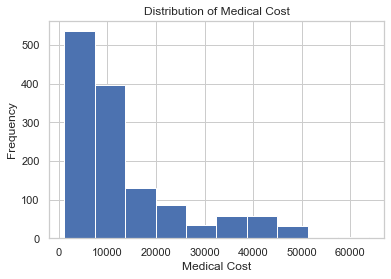

Figure 1: Distribution of the Medical Cost


In [996]:
# Distribution of the target class
medicalCost = df1[['medicalCost']].to_numpy()

plt.hist(medicalCost)
plt.xlabel('Medical Cost')
plt.ylabel('Frequency')
plt.title('Distribution of Medical Cost')
plt.show()
print('Figure 1: Distribution of the Medical Cost')


The target variable, medical cost values are known and present in the dataset. Therefore, a supervised method is more suitable for predicting medical costs. 

Since the target variable has continuous values, as shown in figure 1, regression analysis is better for predicting medical costs than classification or clustering. Additionally, for classification, labelled classes have to introduce to the medical cost variable and clustering is mainly done when the target class is unknown.

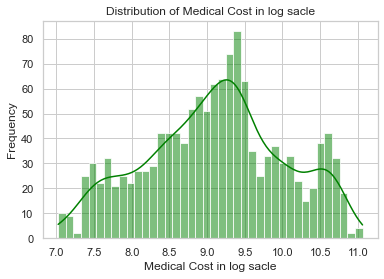

Figure 2: Distribution of Medical Cost in log sacle


In [997]:
# Distribution of the log transformation of the target class
sns.histplot(np.log(df1['medicalCost']), bins=40,
             color='green', stat='count', kde=True)
plt.xlabel('Medical Cost in log sacle')
plt.ylabel('Frequency')
plt.title('Distribution of Medical Cost in log sacle')
plt.show()

print('Figure 2: Distribution of Medical Cost in log sacle')


Medical cost is highly skewed. According to the figure 1, majority of the values lies below 2000, while maximum value exceeds 60000. Therefore, a log scale is used to visualise data in order to extract features of the dense area of the distribution.
Log scale values of the medical cost show a distribution closer to a normal distribution. There are three modes and one of them is prominent.


In [998]:
# Percentage of values missing in each column
for column in df1.columns:
    percentage = df1[column].isnull().mean()
    print(f'{column}: {round(percentage*100,4)}%')


age: 0.0%
sex: 0.0%
bmi: 0.0%
children: 0.0%
smoker: 0.0%
region: 0.0%
medicalCost: 0.0%


Analysis of missing values found that there are no missing values in the dataset.

In [999]:
print('Table 1: Basic statistics of the continuous variables')
df1.describe()


Table 1: Basic statistics of the continuous variables


,age,bmi,children,medicalCost
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The age variable has values from 18 to 64. A mean of 39.2 for the age variable shows that distribution is approximately balanced, with slightly more observations having lower values. The standard deviation of 14 shows a high spread of values over the range.

BMI shows that half of the values range from 26.2 to 34.6. A small standard deviation shows a low spread.

The children variable has close to 25% of values with zero, and half of the values are less than or equal to one. This shows a highly skewed distribution. The standard deviation of 1.2 shows low spread of the values around mean 1.09

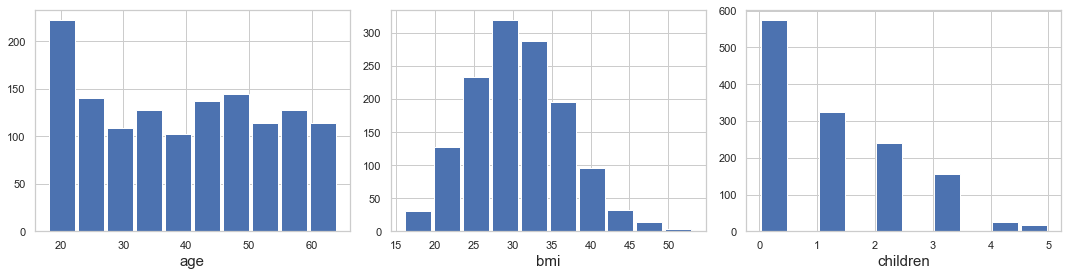

Figure 3: Distribution of the continuous variables


In [1000]:
# Distribution of continuous variables
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(df1.iloc[:, 0], rwidth=0.9)
plt.xlabel(df1.columns[0], fontsize=15)

plt.subplot(1, 3, 2)
plt.hist(df1.iloc[:, 2], rwidth=0.9)
plt.xlabel(df1.columns[2], fontsize=15)

plt.subplot(1, 3, 3)
plt.hist(df1.iloc[:, 3], rwidth=0.9)
plt.xlabel(df1.columns[3], fontsize=15)
plt.tight_layout()
plt.show()
print('Figure 3: Distribution of the continuous variables')


Figure 3 shows the distribution of the continuous variables. The age distribution shows a closely uniform distribution with a higher bar at age 20. This shows that there is more observation recorded for ages around 20. Age values have a minimum of 18 and a maximum of 64 when compared to Table 1.

Bmi shows a unimodal normal distribution with a mean of 30.6. Values lie from 15.96 to 53.13 and have a standard deviation of 6.0. This shows most people are in the unhealthy range of Bmi as per the NHS guidelines (2022).

The number of children per individual is declining sharply with the number of children. There are close to 600 individuals with no children and little over 300 individuals with one child, and only 18 individuals with five children. The mean of the distribution is 1.09, with a minimum of 0 and a maximum of 5, suggesting a highly skewed distribution

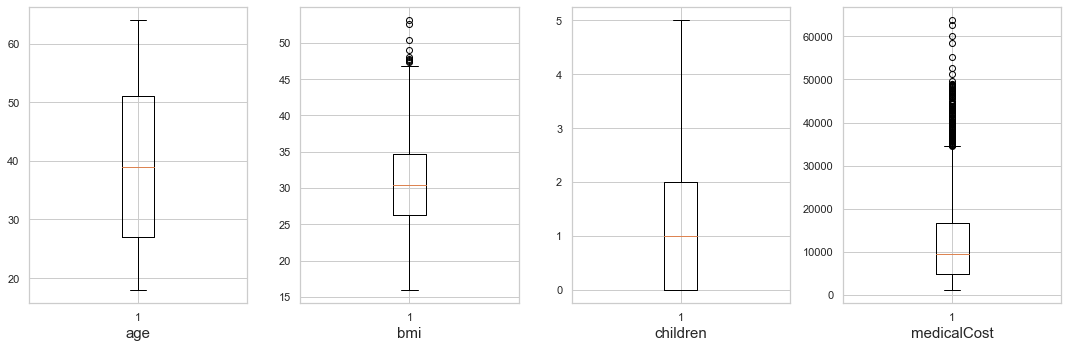

Figure 4: Boxplot of the continuous variables


In [1001]:
# Boxplot of continuous variables
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.boxplot(df1[['age']])
plt.xlabel(df1.columns[0], fontsize=15)

plt.subplot(1, 4, 2)
plt.boxplot(df1[['bmi']])
plt.xlabel(df1.columns[2], fontsize=15)

plt.subplot(1, 4, 3)
plt.boxplot(df1[['children']])
plt.xlabel(df1.columns[3], fontsize=15)

plt.subplot(1, 4, 4)
plt.boxplot(df1[['medicalCost']])
plt.xlabel(df1.columns[6], fontsize=15)

plt.tight_layout()
plt.show()
print('Figure 4: Boxplot of the continuous variables')


Figure 4 shows that the age variable has a more balanced distribution and no outliers. Bmi is also a balanced distribution. However, it has outliers at the higher end of the distribution, The anaysis is not removing outliers as they can be important to certain health conditions such as obesity. The number of children variable has no outliers, but there are more individuals with a low number of children than a high number of children, as seen in histograms in Figure 3.

The target variable medical cost has more low-cost values than high-cost values. There are a lot of outliers at the higher end, and few outliers exist over 50000. The outliers with highest values are analised further.

In [1002]:
# Extreme outliers are analised more closely.
df1[df1['medicalCost'] > 50000]


,age,sex,bmi,children,smoker,region,medicalCost
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


There are no clear patterns or no prominent features identified except every one is smokers from this outlier of the medical cost variable. It does not seems like errornous data. Therefore, they are not dropped from the analysis. These values can result from an accident or emergency surgeries, so they might add value to the analysis.

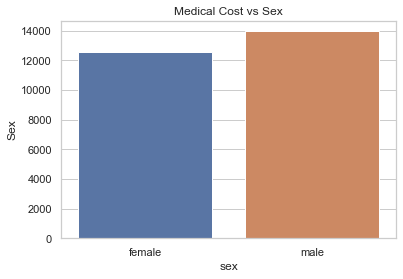

Figure 5: Medical cost vs Sex


In [1003]:
# Bar chart of Medical Cost vs Sex
sns.set_theme(style="whitegrid")
sns.barplot(x='sex', y='medicalCost', data=df1, ci=None)
plt.ylabel('Medical Cost')
plt.ylabel('Sex')
plt.title('Medical Cost vs Sex')
plt.show()
print('Figure 5: Medical cost vs Sex')


According to figure 5, Even though males has higher medical cost recorded at around 14000, there is only slight difference in the medical costs as females have medical expense recorded just below 13000.

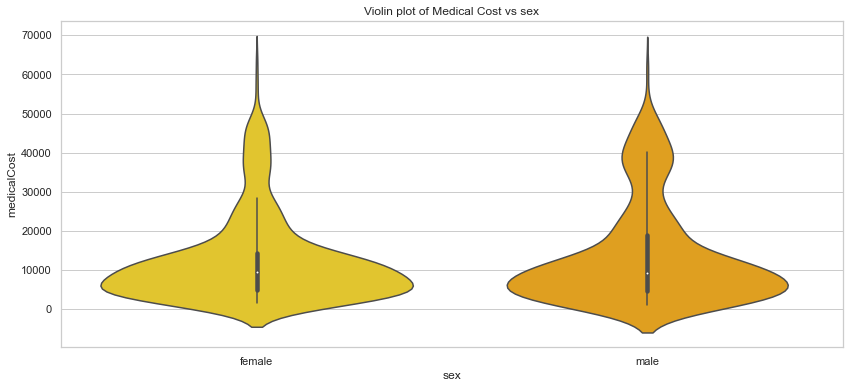

Figure 6: Violin plot of Medical Cost vs Sex


In [1004]:
# Violin plot of Medical Cost vs Sex
f = plt.figure(figsize=(14, 6))

sns.violinplot(x='sex', y='medicalCost', data=df1, palette='Wistia')
plt.title('Violin plot of Medical Cost vs sex')
plt.show()
print('Figure 6: Violin plot of Medical Cost vs Sex')


Figure 6 shows that there are more males in the higher range of medical costs than females. For the lower range around zero to 20000, the distribution shows approximately the same number of individuals for males and females. The mean is also same in the two distributions and closer to the population mean of 13270 when refence to the table 1.

Figure 2.1: Number of observations representing each value of the smoker label


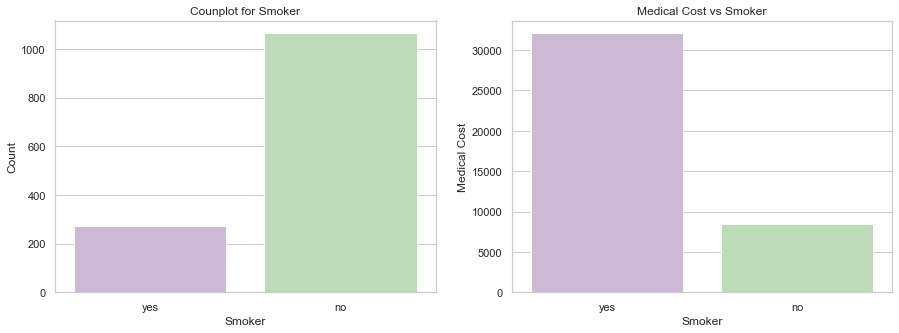

Figure 7: Medical Cost vs Smoker


In [1005]:
# Count plot of Smoker variable
f = plt.figure(figsize=(15, 5))
ax = f.add_subplot(121)
sns.countplot(x='smoker', palette='PRGn', data=df1, ax=ax)
print('Figure 2.1: Number of observations representing each value of the smoker label')
plt.ylabel('Count')
plt.xlabel('Smoker')
plt.title('Counplot for Smoker')

# Bar chart of Medical Cost vs Smoker
sns.set_theme(style="whitegrid")
ax = f.add_subplot(122)
sns.barplot(x='smoker', y='medicalCost',
            palette='PRGn', data=df1, ci=None, ax=ax)
plt.ylabel('Medical Cost')
plt.xlabel('Smoker')
plt.title('Medical Cost vs Smoker')
plt.show()
print('Figure 7: Medical Cost vs Smoker')

plt.show()


According to figure 7, it is clear that smoking individuals have spent more than three times as non-smoker on medical costs. Consequently can interprit as theree is a drastic difference in medical costs for smoking and non-smoking individuals. Counplot shows that the dataset only has around 250 smokers; in contrast, there are over 1000 non-smokers.

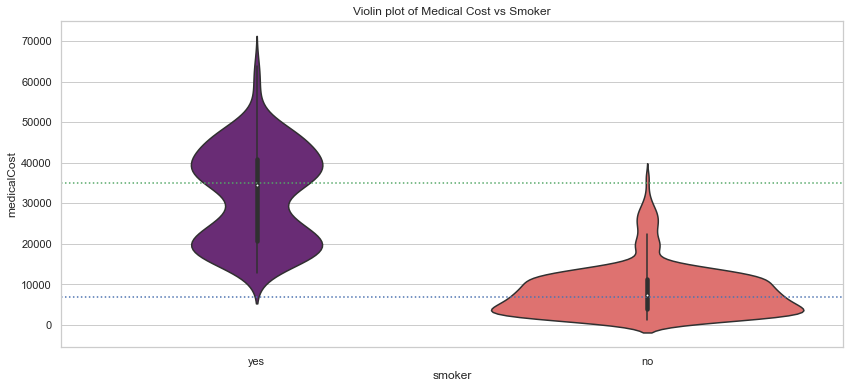

Figure 8: Violin plot of Medical Cost vs Smoker


In [1006]:
# Violin plot of Medical Cost vs Smoker
f = plt.figure(figsize=(14, 6))

sns.violinplot(x='smoker', y='medicalCost', data=df1, palette='magma')
plt.title('Violin plot of Medical Cost vs Smoker')
plt.axhline(y=35000, color='g', linestyle='dotted')
plt.axhline(y=7000, color='b', linestyle='dotted')

plt.show()
print('Figure 8: Violin plot of Medical Cost vs Smoker')


Figure 8 shows that the medical cost for smokers is a much wide range compared to non-smokers. It is clear also that the highest value of medical cost for a non-smoking person is around 40000, and most values distributed below 20000; while for a smoking person, the medical cost goes over 60000, majority of the records lie between 15000 to 50000. The average Medical cost for a non-smoker is approximately 7000; for a smoker, the minimum medical cost is around 7000. The highest value of medical expenditure for non-smoking individuals and mean value for smoking individuals lie very closely. These observations show that there is a significant difference in medical costs for smoking and non-smoking person.

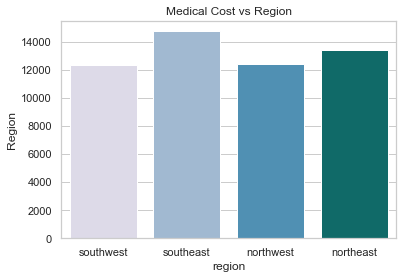

Figure 9: Medical Cost vs Region


In [1007]:
# Bar chart of Medical Cost vs Region
sns.set_theme(style="whitegrid")
sns.barplot(x='region', y='medicalCost', data=df1, palette='PuBuGn', ci=None)
plt.ylabel('Medical Cost')
plt.ylabel('Region')
plt.title('Medical Cost vs Region')
plt.show()
print('Figure 9: Medical Cost vs Region')


Medical cost does not show much difference in the region. Southeast shows a slightly higher value for the medical cost, and the northeast shows the lowest value. 

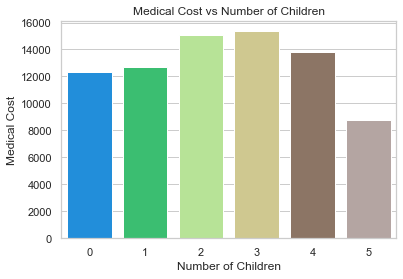

Figure 10: Medical Cost vs Number of Children


In [1008]:
# Bar chart of Medical Cost vs Children
sns.set_theme(style="whitegrid")
sns.barplot(x='children', y='medicalCost',
            data=df1, palette='terrain', ci=None)
plt.ylabel('Medical Cost')
plt.xlabel('Number of Children')
plt.title('Medical Cost vs Number of Children')
plt.show()
print('Figure 10: Medical Cost vs Number of Children')


Medical cost vs a number of children shows that individuals with two and three children spend more on medical costs than other groups. The lowest value for medical cost resulted from individuals with five children.

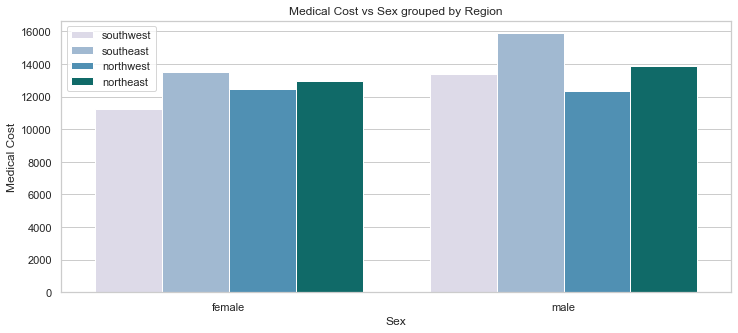

Figure 11: Medical Cost vs Sex grouped by Region


In [1009]:
# Bar chart of Medical Cost vs Region by Sex
f = plt.figure(figsize=(12, 5))
sns.set_theme(style="whitegrid")
sns.barplot(x='sex', y='medicalCost', hue='region',
            data=df1, palette='PuBuGn', ci=None)
plt.ylabel('Medical Cost')
plt.legend(loc='upper left')
plt.xlabel('Sex')
plt.title('Medical Cost vs Sex grouped by Region')
plt.show()
print('Figure 11: Medical Cost vs Sex grouped by Region')


Medical cost for Sex, when grouped by region, shows the highest for the southeast, same as the graph for the whole population in figure 9. However, in contrast to figure 9, the lowest for females was recorded from the southwest, while the lowest for males was recorded from the northwest, as same as figure 9.

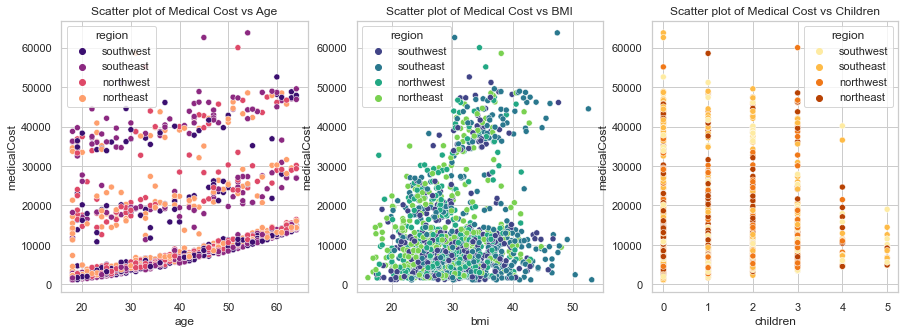

Figure 12: Medical Cost vs continuous variables and Region


In [1010]:
# Scatter plots of Medical Cost vs continuous variables and Region
f = plt.figure(figsize=(15, 5))
ax = f.add_subplot(131)
sns.scatterplot(x='age', y='medicalCost', data=df1,
                palette='magma', hue='region', ax=ax)
ax.set_title('Scatter plot of Medical Cost vs Age')

ax = f.add_subplot(132)
sns.scatterplot(x='bmi', y='medicalCost', data=df1,
                palette='viridis', hue='region')
ax.set_title('Scatter plot of Medical Cost vs BMI')

ax = f.add_subplot(133)
sns.scatterplot(x='children', y='medicalCost', data=df1,
                palette='YlOrBr', hue='region')
ax.set_title('Scatter plot of Medical Cost vs Children')
plt.show()

print('Figure 12: Medical Cost vs continuous variables and Region')


Medical costs are getting higher with age. According to figure 12, there are three separate regions for medical spending when plotted with age. Further analysis can be done to identify any factors affecting this separation. Bmi values for the highest medical costs lie towards the highest end. There are not many high medical cost records in the lower BMIs. However, no clear patterns are visible with the BMI and medical costs. As discussed when analysing figure 10, individuals with five children show lower values for medical costs. The highest numbers are recorded among individuals with no children.

Scatter plots do not show any identifiable pattern with the region in any of the plots.

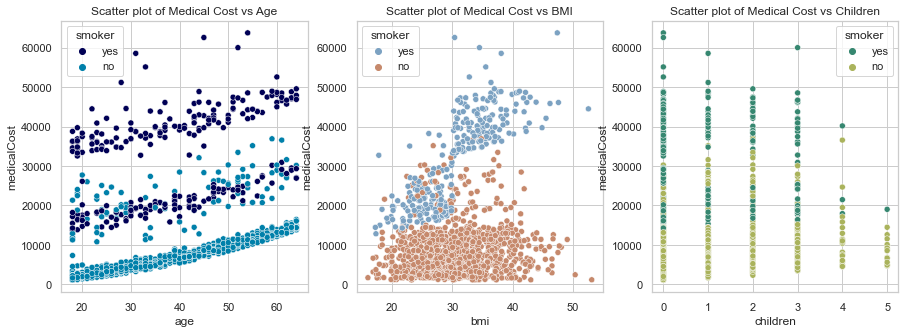

Figure 13: Medical Cost vs continuous variables and Smoker


In [1011]:
# Scatter plots of Medical Cost vs continuous variables and Smoker
f = plt.figure(figsize=(15, 5))
ax = f.add_subplot(131)
sns.scatterplot(x='age', y='medicalCost', data=df1,
                palette='ocean', hue='smoker', ax=ax)
ax.set_title('Scatter plot of Medical Cost vs Age')

ax = f.add_subplot(132)
sns.scatterplot(x='bmi', y='medicalCost', data=df1,
                palette='twilight_shifted', hue='smoker')
ax.set_title('Scatter plot of Medical Cost vs BMI')

ax = f.add_subplot(133)
sns.scatterplot(x='children', y='medicalCost', data=df1,
                palette='gist_earth', hue='smoker')
ax.set_title('Scatter plot of Medical Cost vs Children')
plt.show()

print('Figure 13: Medical Cost vs continuous variables and Smoker')


Figure 13 shows the band that appears in medical cost vs age relates to smoking. The lowest band only has non-smoking individuals. The middle band has both smoking and non-smoking individuals, while the upper ban only has smoking individuals. The other two graphs also show more smoking individuals at the higher end of the graph. 

### Transform categorical varibles to numerical


Lable encoding is used where ever possible to avoid increasing dimensionality. When there are more than two unique values in the column and no specific ordering, Dummy values are used.

In [1012]:
# The lable encoding is used to transform Smoker and Sex variables
le = LabelEncoder()

# Sex variable
le.fit(df1.sex.drop_duplicates())
df1.sex = le.transform(df1.sex)

# Smoker variable
le.fit(df1.smoker.drop_duplicates())
df1.smoker = le.transform(df1.smoker)


In [1013]:
# Dummy variable introduced for region variable
# Pandas.get_dummies is used to get one-hot representation as there is only string values in Region variable
df1_encode = pd.get_dummies(data=df1, prefix='RE', prefix_sep='_',
                            columns=['region'],
                            drop_first=False,
                            dtype='int8')

df1_encode.head(2)


,age,sex,bmi,children,smoker,medicalCost,RE_northeast,RE_northwest,RE_southeast,RE_southwest
0,19,0,27.90,0,1,16884.9240,0,0,0,1
1,18,1,33.77,1,0,1725.5523,0,0,1,0


### Correlation


Correlation is used to identify the relationship between variables and to choose the three best predictors for medical cost. Since there are outliers, Spearman correlation was used here as it calculates correlation using the ranking method. Moreover, the Pearson correlation compares numerical relationships and is sensitive to outliers.

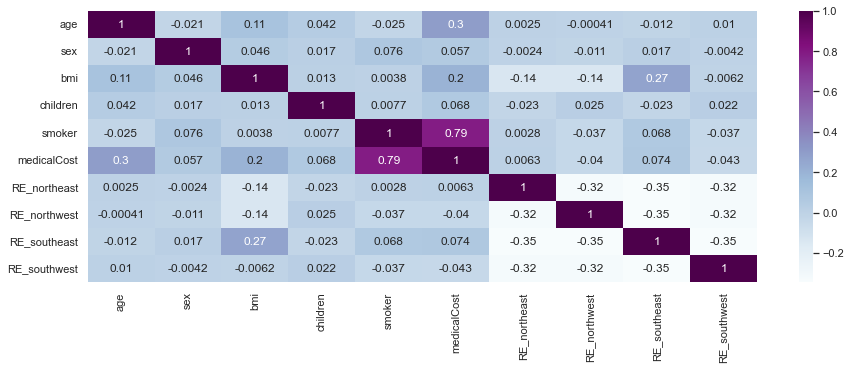

Figure 14: Correlation plot for all the variables in the dataset


In [1014]:
plt.figure(figsize=(15, 5))

# Plot the heatmap, since there are outliers Spearman correlation was used here.
sns.heatmap(df1_encode.corr(method='pearson'),
            cmap='BuPu',
            annot=True,)
plt.show()
print('Figure 14: Correlation plot for all the variables in the dataset')


Correlation analysis shows the highest correlation with the smoker column and second higher for the age column, and the third for BMI. The smoker variable shows a strong positive correlation with 0.79. Age and BMI show a weak positive correlation with 0.3 and 0.2. All the other variables show almost no correlation, with a correlation coefficient of less than 0.1. Therefore age, smoker and BMI are identified as the best three predictors for medical cost.

### Simple linear models to predict Medical Cost with three best predictors

#### Simple linear model to predict Medical Cost with Age


<br>

In [1015]:
# Select dependent and independent variable 
x1 = df1_encode[['age']]
y = df1_encode[['medicalCost']]

# Split data in to train and test set
x1_train, x1_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.2, random_state=3)

# Initialise the Linear Regression model
model = LinearRegression()

# Fit data to the model
model.fit(x1_train, y_train)

print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')
y_pred = model.predict(x1_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


intercept: [3089.27775168]
slope: [[258.24833494]]
Mean squared error: 137276316.90775076
R-squared: 0.08984531343011881


The model has an R-squared of 0.08, which suggest the dependent variable does not explain the variation of the independent variable properly, as the R-squared is closer to 0 than 1. The slope of 258 shows that for each year increase in age, there is a 258 increase in medical cost. The mean squared error is equal to 137,276,316, a fairly large value. As figure 15 shows, the three bands of medical costs had to predict when using simple regression. Figure 15 also shows the inrease of the medical cost when the age increases.

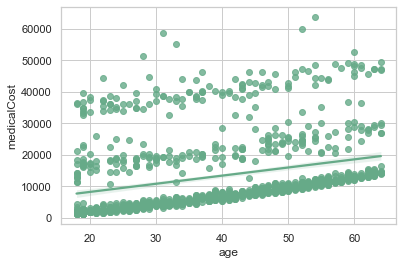

Figure 15: Regression line for Medical Cost and Age


In [1016]:
sns.regplot(x=x1_train, y=y_train, color='#66AA88')
plt.show()
print('Figure 15: Regression line for Medical Cost and Age')


The higher value of residual error can be resulted from the significant variation of medical cost for a certain age value as seen in figure 15.

#### Simple linear model to predict Medical Cost with Smoker
<br>

In [1017]:
# Select dependent and independent variable 
x1 = df1[['smoker']]
y = df1[['medicalCost']]

# Split data in to train and test set
x1_train, x1_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.2, random_state=3)

# Initialise the Linear Regression model
model = LinearRegression()

# Fit data to the model
model.fit(x1_train, y_train)

print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')
y_pred = model.predict(x1_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


intercept: [8433.799658]
slope: [[23506.57981273]]
Mean squared error: 55347801.452357695
R-squared: 0.6330389537107518


The model has R-squared 0.6, which is slightly a better prediction as the value is closer to the middle value between 0 and 1. Dependent variable somewhat explains the difference in independent variable. Here slope does not hold much information as the dependent variable is a binary variable. The mean squared error is equal to 55,347,801, a fairly large value. Figure 16 shows a regression line fitted to the data. Figure 16 also shows the inrease of the medical cost in the two category of smiking and non-smoking. 

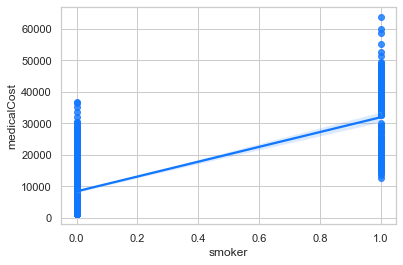

Figure 16: Regression line for Medical Cost and Smoker


In [1018]:
sns.regplot(x=x1_train, y=y_train, color='#1177FF')
plt.show()
print('Figure 16: Regression line for Medical Cost and Smoker')


There is a clear pattern for medical costs for smokers and non-smokers. The regression plot in figure 16 shows the increase in medical costs for smoking individuals. Clearly, there are a significant amount of residuals.

#### Simple linear model to predict Medical Cost with BMI
<br>

In [1019]:
# Select dependent and independent variable 
x1 = df1_encode[['bmi']]
y = df1_encode[['medicalCost']]

# Split data in to train and test set
x1_train, x1_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.2, random_state=3)

# Initialise the Linear Regression model
model = LinearRegression()

# Fit data to the model
model.fit(x1_train, y_train)

print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')
y_pred = model.predict(x1_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


intercept: [1310.83699573]
slope: [[387.33454902]]
Mean squared error: 144140190.02346116
R-squared: 0.04433719939408365


The model has R-squared 0.04, which suggests the BMI does not explain the change in medical cost well as R-squared is closer to 0 than 1. The slope shows a 387 increase in medical cost for a unit increase in BMI. The mean squared error is equal to 144,140,190, a reasonably large value. Figure 17 shows that there is a lot of observation lying fairly far away from the regression line toward the higher values of BMI.

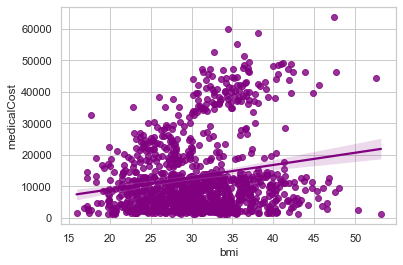

Figure 17: Regression line for Medical Cost and BMI


In [1020]:
sns.regplot(x=x1_train, y=y_train, color='purple')
plt.show()
print('Figure 17: Regression line for Medical Cost and BMI')


Figure 17 shows that when BMI increases, the residuals gets larger as the medical cost spreads in lager range.

Models with BMI and Age has much smaller R-squared value than the one with Smoker. Smoker variable has been able to explain the difference in medical cost than Age and BMI. The line in figure 16 has a higher angle with a slope value of 23506 than the linear model for BMI with a slope value of 387 and age with a slope value of 258. **Overall, the model with the smoker variable performs better** when compared R-squared value and mean squared error.

### Multivariate regression models to predict Medical Cost


There are two multivariate models creatd with three best predictors and with all the vaariables.

#### Multivariate regression model to predict Medical Cost with Age, Smoker and BMI.
<br>

In [1021]:
# Dropping all the variables except three highest correlated variables from dependent variables.
x1 = df1_encode.drop(columns=['sex', 'medicalCost', 'RE_northeast',
                     'RE_northwest', 'RE_southeast', 'RE_southwest', 'children'])
# Select dependent variable 
y = df1_encode[['medicalCost']]

# Split data in to train and test set
x1_train, x1_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.2, random_state=3)

# Initialise the Linear Regression model
model = LinearRegression()

# Fit data to the model
model.fit(x1_train, y_train)

print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')
y_pred = model.predict(x1_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


intercept: [-12297.07065608]
slope: [[  265.48317257   333.28328133 23817.80914975]]
Mean squared error: 38904433.375912696
R-squared: 0.7420600059569823


The multivariate model with all three variables has a lower mean squared error than simple linear models with each of them. Where a model with age has 137,276,316, a model with a smoker has 55,347,801, the model with BMI has 144,140,190, and the model with all three variables has 38,904,433, which is a better value than the best simple leaner model. 

R-squared value also shows a similar result, with value of 0.74 for the multivariate model with three variables which is much closer to 1 than 0. Slopes for each variable stay closer to the linear models. Three dependent variables together has been able to explain the difference in Medical Cost than separately.

In multivariate models fitted plane is not possible to visualise. Therefore, actual value vs predicted value plot, residual plot and the distribution o the residuals plot are analysed to see the performance of the model.

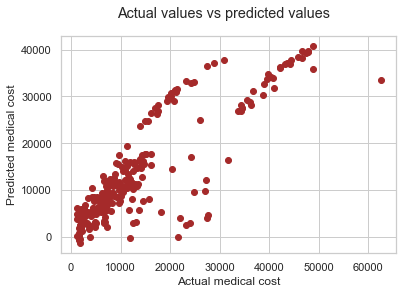

Figure 18: Actual value vs predicted value plot for multivariate model with Age, BMI and Smoker variables as independent variables


In [1022]:
fig, ax = plt.subplots()

# Scatter plot of Actual value vs predicted value
ax.scatter(y_test, y_pred, color='brown')
fig.suptitle('Actual values vs predicted values')
plt.ylabel('Predicted medical cost')
plt.xlabel('Actual medical cost')
plt.show()
print('Figure 18: Actual value vs predicted value plot for multivariate model with Age, BMI and Smoker variables as independent variables')


Figure 18 shows that higher values are predicted for higher actual values. However, in the range of 10000 to 30000 medical costs, there seems to have a wider range of expected values distributed from around zero to closer to 40000. These are the values that introduced more errors into the model. Lower values of medical costs also have a good prediction.

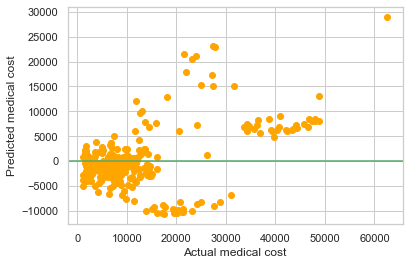

Figure 19: Residual plot for multivariate model with Age, BMI and Smoker variables as independent variables


In [1023]:
# Residual plot
plt.scatter(y_test, (y_test - y_pred), color='orange')
plt.axhline(y=0.0, color='g', linestyle='-')
fig.suptitle('Actual values vs residuals')
plt.ylabel('Predicted medical cost')
plt.xlabel('Actual medical cost')
plt.show()
print('Figure 19: Residual plot for multivariate model with Age, BMI and Smoker variables as independent variables')


The residual plot in figure 19 also confirms the results of figure 18. In the mid-range, there is a higher variation of residual values. It is also clear from figure 19 that the values over 60000 have resulted in the most significant residual of the model.

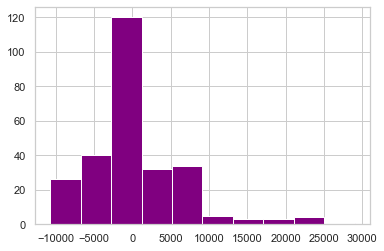

Figure 20: Histogram of residuals for multivariate model with Age, BMI and Smoker variables as independent variables


In [1024]:
# Distribution of the residuals
residuals = (y_test - y_pred)

plt.hist(residuals, color='purple')
plt.show()
print('Figure 20: Histogram of residuals for multivariate model with Age, BMI and Smoker variables as independent variables')


The histogram in figure 20 shows that the distribution of residuals is skewed. There are more zero or negative values than positive values. It is also clear there is a long tail towards the positive end, having larger positive residuals than negative residuals. 

#### Multivariate regression model to predict Medical Cost all the variables.
<br>

In [1025]:
x1 = df1_encode.drop(columns=['medicalCost'])
y = df1_encode[['medicalCost']]

# Split data in to train and test set
x1_train, x1_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.2, random_state=3)

# Initialise the Linear Regression model
model = LinearRegression()

# Fit data to the model
model.fit(x1_train, y_train)

print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')
y_pred = model.predict(x1_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


intercept: [-13172.39719688]
slope: [[  262.31558491  -222.45944647   349.53918186   574.50846193
  23827.48548329   625.80325666   204.49787511  -537.19360189
   -293.10752988]]
Mean squared error: 39202908.26059814
R-squared: 0.7400810898464749


The model has a 0.74 R-squared error which shows a good prediction for the medical cost. The multivariate regression model with all the variables is performing closer to the multivariate model with the three best variables. The performance here is slightly reduced than the model with three variables when comparing the R-squared value and mean squared error.

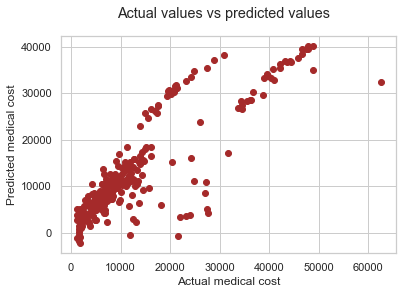

Figure 21: Actual value vs predicted value plot for multivariate model with all the independent variables


In [1026]:
fig, ax = plt.subplots()

# Scatter plot of Actual value vs predicted value
ax.scatter(y_test, y_pred, color='brown')
plt.ylabel('Predicted medical cost')
plt.xlabel('Actual medical cost')
fig.suptitle('Actual values vs predicted values')
plt.show()
print('Figure 21: Actual value vs predicted value plot for multivariate model with all the independent variables')


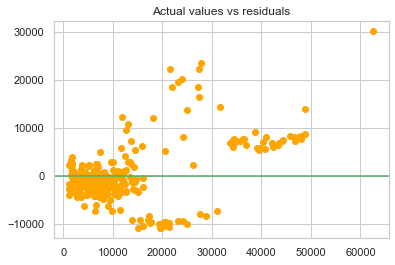

Figure 22: Residual plot for multivariate model with all the independent variables


In [1027]:
# Residual plot
plt.scatter(y_test, (y_test - y_pred), color='orange')
plt.axhline(y=0.0, color='g', linestyle='-')
plt.title('Actual values vs residuals')
plt.show()
print('Figure 22: Residual plot for multivariate model with all the independent variables')


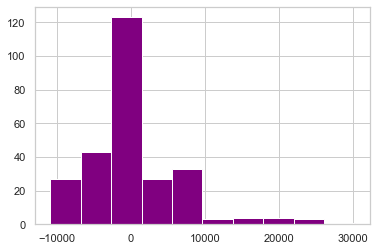

Figure 23: Histogram of residuals for multivariate model with all the independent variables


In [1028]:
# Distribution of the residuals
residuals = (y_test - y_pred)

plt.hist(residuals, color='purple')
plt.show()
print('Figure 23: Histogram of residuals for multivariate model with all the independent variables')


The actual value vs predicted value plot in the figure 21, actual values vs residuals in figure 22 and the distribution of the residuals in figure 23 show almost similar results for the respective plot for the multivariate model with the best three predicters. The highest positive error value seems slightly higher in the model with all the variables in it than in the model with only the three best predictors. 


### Conclusion


The best simple linear model for predicting medical costs is the one with the Smoker variable. The Smoker variable has the best prediction power among the simple linear models. This can be understandable because it has the highest correlation. The three best predictors could predict medical costs with the same accuracy as all the variables together.

Overall, it is clear from the above results that the multivariate regression model with the three best predictors predicts medical cost better than all the other four models trained in this task. Given the time taken to train the model using all of the variables and best-correlated variables, and that compared with the accuracy of the prediction, the model with the best predictors chosen based on correlation seems the best choice.

***

## Question 2: Census Income



### Introduction


The dataset contains US census data, and the task is to predict whether a given individual earns more than $50000. The data set is labelled and includes two classes. Five machine learning models with different classifiers and two artificial neural network models with a different number of layers are used to predict the income of an individual. The list of variables in the dataset is:

- age: the age of an individual
- workclass: employment status of an individual
- fnlwgt: final weight. The number of people the census believes the entry represents
- education: the highest level of education achieved by an individual
- education-num: the highest level of education achieved in numerical form
- marital-status: marital status of an individual.
- occupation: the general type of occupation of an individual
- relationship: represents what this individual is relative to others
- sex: the biological sex of the individual
- capital-gain: capital gains for an individual
- capital-loss: capital loss for an individual
- hours-per-week: the hours an individual has reported to work per week 
- native-country: country of origin for an individual
- label: whether or not an individual makes more than $50,000 annually.

### Data Understanding and Preperration


The distribution of the data, type of the data, missing values, and a number of unique values in the data are analysed. Missing values are imputed based on the distribution of the data. Correlation is used to understand the relationship of the variables.

Lable encoding, One hot encoding is used to transform categorical data and scaling is done before using data in the machine learning models.

In [1031]:
# Read data from csv to pandas dataframe
df2 = pd.read_csv('CensusDB.csv', na_values=['?'])
df2.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,Male,0,3004,60,NaN,>50K


In [893]:
print('Number of rows and columns in the dataset: ', df2.shape)
print('There are six continuous variables and eight categorical variables.')


Number of rows and columns in the dataset:  (32561, 14)
There are six continuous variables and eight categorical variables.


In [894]:
df2.isnull().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [895]:
# Percentage of values missing in each column
for column in df2.columns:
    percentage = df2[column].isnull().mean()
    print(f'{column}: {round(percentage*100,4)}%')


age: 0.0%
workclass: 5.6386%
fnlwgt: 0.0%
education: 0.0%
education-num: 0.0%
marital-status: 0.0%
occupation: 5.6601%
relationship: 0.0%
sex: 0.0%
capital-gain: 0.0%
capital-loss: 0.0%
hours-per-week: 0.0%
native-country: 1.7905%
income: 0.0%


There are missing values present in the dataset. According to the distribution of the variables, missing values should be imputed as there are only three missing values per row at maximum. Dropping the row is a disadvantage to the analysis because it deletes the information of the other variables.

In [896]:
max_missing = 0
# Count of missing values across rows
for i in range(len(df2.index)):
    missing_current_row = df2.iloc[i].isnull().sum()
    if(max_missing < missing_current_row):
        max_missing = missing_current_row

print('maximum null values in a row : ', max_missing,
      '\nTherefore, dropping rows containing missing values is disadvantageous. Dropping the entire rows not considered as it deletes data of the other 11 rows')
print()


maximum null values in a row :  3 
Therefore, dropping rows containing missing values is disadvantageous. Dropping the entire rows not considered as it deletes data of the other 11 rows



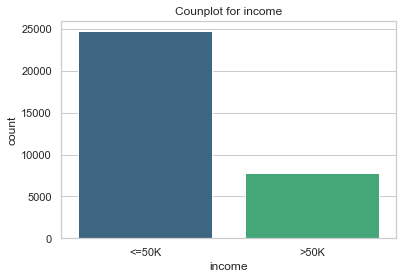

Figure 2.1: Number of observations representing each value of the income label


In [1030]:
# Countplot for Income
sns.countplot(x='income', palette='viridis', data=df2)
plt.title('Counplot for income')
plt.show()
print('Figure 2.1: Number of observations representing each value of the income label')

Figure 2.1 shows the target class does not have a balanced number of observations for each label of the target class. The models should be evaluated depending on this to get better performance from the unbalanced dataset.

In [898]:
df2.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


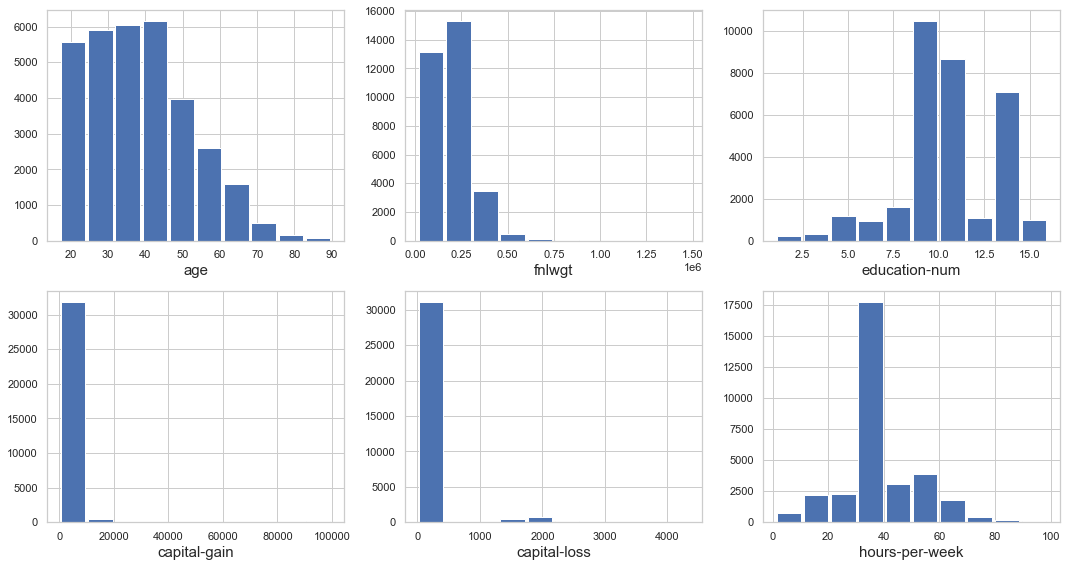

Figure 2.2: Distribution of the continuous variables


In [899]:
# Histograms of continuous variables
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.hist(df2.iloc[:, 0], rwidth=0.9)
plt.xlabel(df2.columns[0], fontsize=15)

plt.subplot(2, 3, 2)
plt.hist(df2.iloc[:, 2], rwidth=0.9)
plt.xlabel(df2.columns[2], fontsize=15)

plt.subplot(2, 3, 3)
plt.hist(df2.iloc[:, 4], rwidth=0.9)
plt.xlabel(df2.columns[4], fontsize=15)

plt.subplot(2, 3, 4)
plt.hist(df2.iloc[:, 9], rwidth=0.9)
plt.xlabel(df2.columns[9], fontsize=15)

plt.subplot(2, 3, 5)
plt.hist(df2.iloc[:, 10], rwidth=0.9)
plt.xlabel(df2.columns[10], fontsize=15)

plt.subplot(2, 3, 6)
plt.hist(df2.iloc[:, 11], rwidth=0.9)
plt.xlabel(df2.columns[11], fontsize=15)

plt.tight_layout()
plt.show()
print('Figure 2.2: Distribution of the continuous variables')


All the distributions are uneven distributions. Especially, Capital gain and Capital loss are highly skewed as can be seen in the boxplot in Figure 2.2. Hours per week shows a extremly high bar around 40 this can be interpreted as the normal hours for 8 or 7.5 hours per day working patern for a fultime employee. So it is understandable to have higher number of observations for this value.

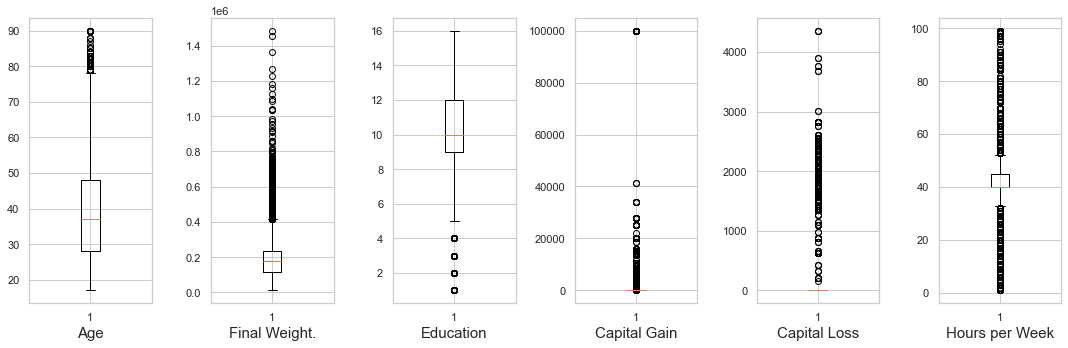

Figure 2.3: Boxplot of the continuous variables


In [900]:
# Boxplot of the continuous variables
fig, ax = plt.subplots(1, 6, figsize=(15, 5))

plt.subplot(1, 6, 1)
plt.boxplot(df2[['age']])
plt.xlabel('Age', fontsize=15)

plt.subplot(1, 6, 2)
plt.boxplot(df2[['fnlwgt']])
plt.xlabel('Final Weight.', fontsize=15)

plt.subplot(1, 6, 3)
plt.boxplot(df2[['education-num']])
plt.xlabel('Education', fontsize=15)

plt.subplot(1, 6, 4)
plt.boxplot(df2[['capital-gain']])
plt.xlabel('Capital Gain', fontsize=15)

plt.subplot(1, 6, 5)
plt.boxplot(df2[['capital-loss']])
plt.xlabel('Capital Loss', fontsize=15)

plt.subplot(1, 6, 6)
plt.boxplot(df2[['hours-per-week']])
plt.xlabel('Hours per Week', fontsize=15)

plt.tight_layout()
plt.show()
print('Figure 2.3: Boxplot of the continuous variables')


A boxplot is used to identify outliers. From figure 2.3, it is clear that all the continuous variables have outliers. Age and Final Weight have outliers at the higher end of the distribution. Education has outliers at the lower end. The other three variables have outliers on both sides.

This analysis suggests that the capital-gain variable has extreme values at 99999. Observations with these values are dropped as it seems to be erroneous data, and not clear how to validate the data with the given information.

In [901]:
# Drop the rows with extream vales of capital gain
df2.drop(df2[df2['capital-gain'] >= 60000].index, inplace=True)


In [902]:
# Frequency table for Workclass variable
freq_table = pd.crosstab(df2['workclass'], df2['income'])
freq_table


income,<=50K,>50K
workclass,,
Federal-gov,589,370
Local-gov,1476,611
Never-worked,7,0
Private,17733,4881
Self-emp-inc,494,586
Self-emp-not-inc,1817,695
State-gov,945,352
Without-pay,14,0


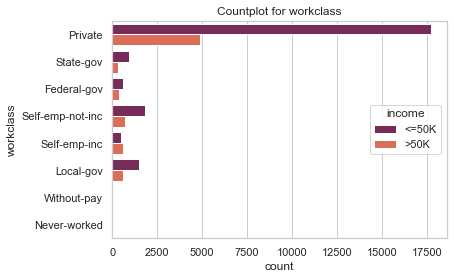

Figure 2.4: Countplot for Workclass


In [903]:
# Countplot for Workclass variable
sns.set_theme(style="whitegrid")
sns.countplot(y='workclass', hue='income', palette='rocket', data=df2)
plt.title('Countplot for workclass')
plt.show()
print('Figure 2.4: Countplot for Workclass')


There are more low-income individuals, and fewer high-income individuals are visible in all the classes. In the private work-class category, the difference is significantly large.

In [904]:
# Impute missing values with mode of the variable
df2['workclass'] = df2['workclass'].fillna(df2['workclass'].mode()[0])


In [905]:
# Frequency table for Occupation variable
freq_table = pd.crosstab(df2['occupation'], df2['income'])
freq_table


income,<=50K,>50K
occupation,,
Adm-clerical,3263,501
Armed-Forces,8,1
Craft-repair,3170,921
Exec-managerial,2098,1926
Farming-fishing,879,115
Handlers-cleaners,1284,85
Machine-op-inspct,1752,249
Other-service,3158,135
Priv-house-serv,148,1


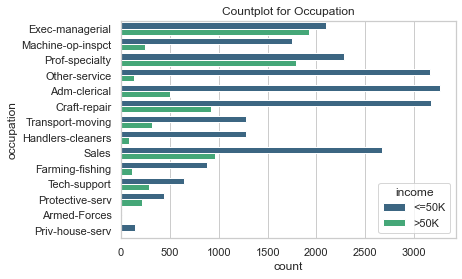

Figure 2.5: Countplot for Occupation


In [906]:
# Countplot for Occupation variable
sns.countplot(y='occupation', hue='income', palette='viridis', data=df2)
plt.title('Countplot for Occupation')
plt.show()
print('Figure 2.5: Countplot for Occupation')


The same pattern of more low-income individuals and fewer high-income individuals is visible in all the classes. However, for Executive Managerial category and Professional Speciality categories have little difference in the two groups.

In [907]:
# Impute missing values with mode of the variable
df2['occupation'] = df2['occupation'].fillna(df2['occupation'].mode()[0])


In [908]:
# Number of unique values in the native country column
len(df2['native-country'].unique())


42

There are too many unique values in the native countries variable. In order to reduce dimensionality, their values are categorised based on geographical location.

In [909]:
# Frequency table for Native Country variable
freq_table = pd.crosstab(df2['native-country'], df2['income'])
freq_table


income,<=50K,>50K
native-country,,
Cambodia,12,7
Canada,82,38
China,55,20
Columbia,57,2
Cuba,70,25
Dominican-Republic,68,1
Ecuador,24,4
El-Salvador,97,9
England,60,30


In [910]:
df2['native-country'] = df2['native-country'].fillna('Other')


The missing values in the native countries have been imputed with the value **other**. All the other wrong country names are categorised as 'other' in the next step, and other native countries are separated into groups depending on the region.

In [911]:
# Native Country grouping using geographical location
df2.loc[df2['native-country'] == 'Cambodia', 'native-country'] = 'Asia'
df2.loc[df2['native-country'] == 'China', 'native-country'] = 'Asia'
df2.loc[df2['native-country'] == 'Vietnam', 'native-country'] = 'Asia'
df2.loc[df2['native-country'] == 'Thailand', 'native-country'] = 'Asia'
df2.loc[df2['native-country'] == 'Taiwan', 'native-country'] = 'Asia'
df2.loc[df2['native-country'] == 'Philippines', 'native-country'] = 'Asia'
df2.loc[df2['native-country'] == 'Japan', 'native-country'] = 'Asia'
df2.loc[df2['native-country'] == 'Hong', 'native-country'] = 'Asia'
df2.loc[df2['native-country'] == 'India', 'native-country'] = 'Asia'
df2.loc[df2['native-country'] == 'Iran', 'native-country'] = 'Asia'


df2.loc[df2['native-country'] == 'Portugal', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] == 'Poland', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] == 'Italy', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] == 'Ireland', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] ==
        'Holand-Netherlands', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] == 'Greece', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] == 'Germany', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] == 'France', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] == 'England', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] == 'Scotland', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] == 'Yugoslavia', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] == 'Hungary', 'native-country'] = 'Europe'


df2.loc[df2['native-country'] == 'Trinadad&Tobago',
        'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Puerto-Rico', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Peru', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Nicaragua', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Mexico', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Jamaica', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Honduras', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Haiti', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Guatemala', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'El-Salvador', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Ecuador', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Dominican-Republic',
        'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Cuba', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Columbia', 'native-country'] = 'America'

df2.loc[df2['native-country'] == 'South', 'native-country'] = 'Other'
df2.loc[df2['native-country'] == 'Laos', 'native-country'] = 'Other'
df2.loc[df2['native-country'] ==
        'Outlying-US(Guam-USVI-etc)', 'native-country'] = 'Other'


In [912]:
# Frequency table for modified Native Country variable
pd.crosstab(df2['native-country'], df2['income'])


income,<=50K,>50K
native-country,,
America,1290,109
Asia,449,198
Canada,82,38
Europe,369,152
Other,531,156
United-States,21999,7029


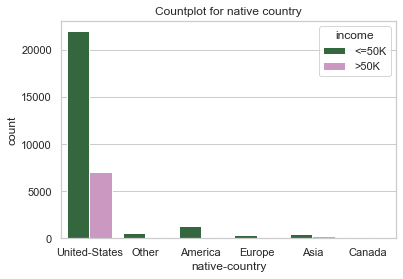

Figure 2.6: Countplot for grouped Native Country


In [913]:
# Countplot for Native Country variable
sns.countplot(x='native-country', hue='income', palette='cubehelix', data=df2)
plt.title('Countplot for native country')
plt.show()
print('Figure 2.6: Countplot for grouped Native Country')


The Native country has the most observations for the United States. There is only a small amount of observations ate recorded for other countries. The bar for lower income than 50000 dollars is prominent across all the countries.

#### Transforming categorical variables with lable encoding and OneHot encoding

\
<br>
Lable encoding is used where ever possible to avoid increasing dimensionality. When there are more than two unique values in the column and no specific ordering, Dummy values are used.

In [914]:
# Lable encoding sex, income
# Because there are only two classes in the below two variables, label encoding is used
le = LabelEncoder()

# Sex variable
le.fit(df2.sex.drop_duplicates())
df2.sex = le.transform(df2.sex)

# Smoker variable
le.fit(df2.income.drop_duplicates())
df2.income = le.transform(df2.income)


In [915]:
# Dummy variable
# Because there are sevaral values of native country, workclass, marital-status, occupation and relationship, and has no ordering, OneHot encoding is used.
# Pandas.get_dummies is used to get one-hot representation as there is only string values in the categorical columns
df2 = pd.get_dummies(data=df2, prefix='country', prefix_sep='_', columns=[
                     'native-country'], drop_first=False, dtype='int8')
df2 = pd.get_dummies(data=df2, prefix='wc', prefix_sep='_', columns=[
                     'workclass'], drop_first=False, dtype='int8')
df2 = pd.get_dummies(data=df2, prefix='ms', prefix_sep='_', columns=[
                     'marital-status'], drop_first=False, dtype='int8')
df2 = pd.get_dummies(data=df2, prefix='oc', prefix_sep='_', columns=[
                     'occupation'], drop_first=False, dtype='int8')
df2 = pd.get_dummies(data=df2, prefix='re', prefix_sep='_', columns=[
                     'relationship'], drop_first=False, dtype='int8')


In [916]:
# Dropp categorical values as they have transformed into other variables
df2 = df2.drop(['education'], axis=1)


#### Correlation analysis
<br>

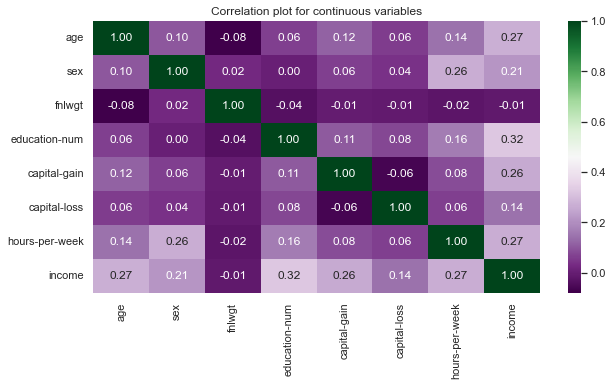

Figure 2.7: Correlation plot for continuous variables


In [917]:
plt.figure(figsize=(10, 5))
# Correlation plot wiht Spearman correlation as the dataset has outliers
sns.heatmap(df2[['age', 'sex', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']].corr(method='spearman'),
            annot=True, fmt='.2f', cmap='PRGn')
plt.title('Correlation plot for continuous variables')
plt.show()
print('Figure 2.7: Correlation plot for continuous variables')


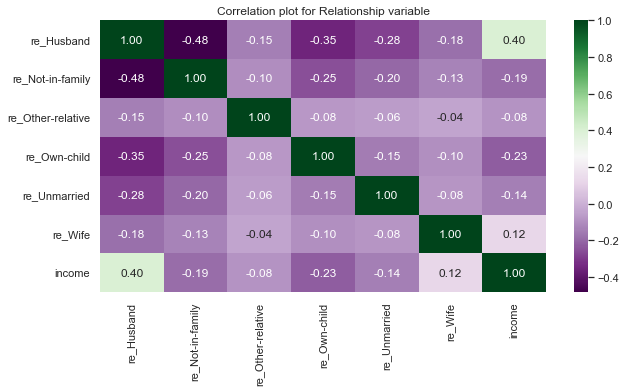

Figure 2.8: Correlation plot for Relationshio variable


In [918]:
plt.figure(figsize=(10, 5))
sns.heatmap(df2[['re_Husband', 're_Not-in-family', 're_Other-relative', 're_Own-child', 're_Unmarried', 're_Wife', 'income']].corr(method='spearman'),
            annot=True, fmt='.2f', cmap='PRGn')
plt.title('Correlation plot for Relationship variable')
plt.show()
print('Figure 2.8: Correlation plot for Relationshio variable')


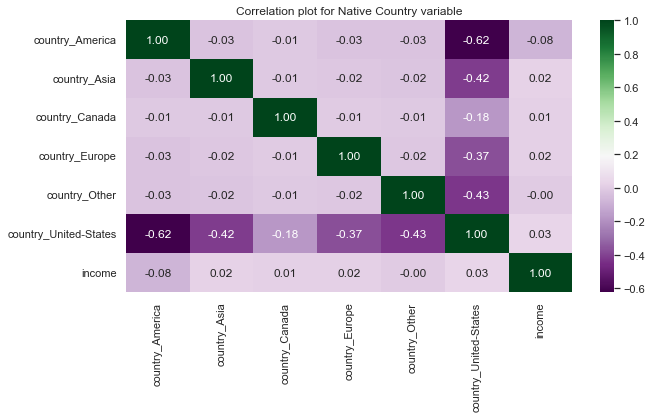

Figure 2.9: Correlation plot for Native County variable


In [919]:
plt.figure(figsize=(10, 5))
sns.heatmap(df2[['country_America', 'country_Asia', 'country_Canada', 'country_Europe', 'country_Other', 'country_United-States', 'income']].corr(method='spearman'),
            annot=True, fmt='.2f', cmap='PRGn')
plt.title('Correlation plot for Native Country variable')
plt.show()
print('Figure 2.9: Correlation plot for Native County variable')


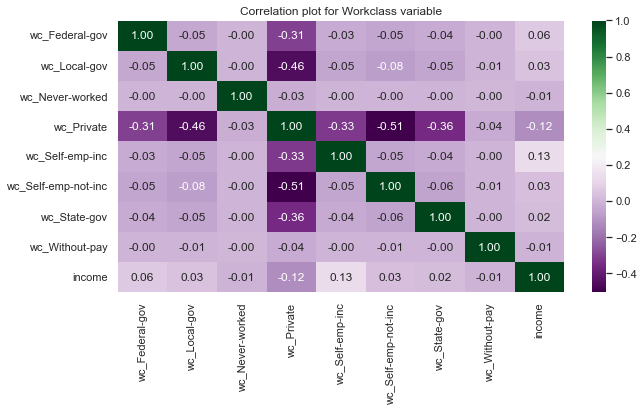

Figure 2.10: Correlation plot for Workclass variable


In [920]:
plt.figure(figsize=(10, 5))
sns.heatmap(df2[['wc_Federal-gov', 'wc_Local-gov', 'wc_Never-worked', 'wc_Private', 'wc_Self-emp-inc', 'wc_Self-emp-not-inc', 'wc_State-gov', 'wc_Without-pay', 'income']].corr(method='spearman'),
            annot=True, fmt='.2f', cmap='PRGn')
plt.title('Correlation plot for Workclass variable')
plt.show()
print('Figure 2.10: Correlation plot for Workclass variable')


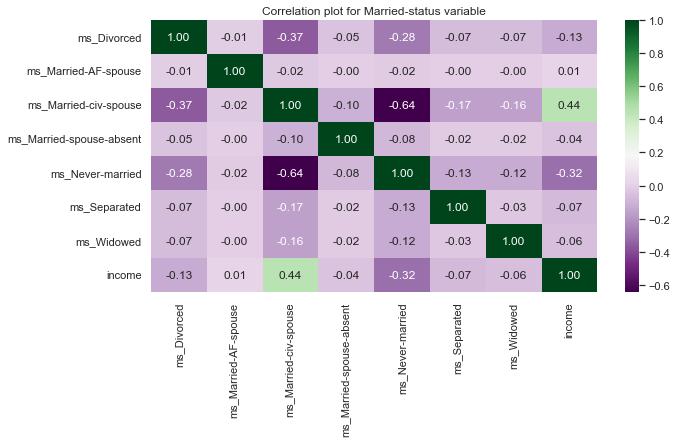

Figure 2.11: Correlation plot for Married-status variable


In [921]:
plt.figure(figsize=(10, 5))
sns.heatmap(df2[['ms_Divorced', 'ms_Married-AF-spouse', 'ms_Married-civ-spouse', 'ms_Married-spouse-absent', 'ms_Never-married', 'ms_Separated', 'ms_Widowed', 'income']].corr(method='spearman'),
            annot=True, fmt='.2f', cmap='PRGn')
plt.title('Correlation plot for Married-status variable')
plt.show()
print('Figure 2.11: Correlation plot for Married-status variable')


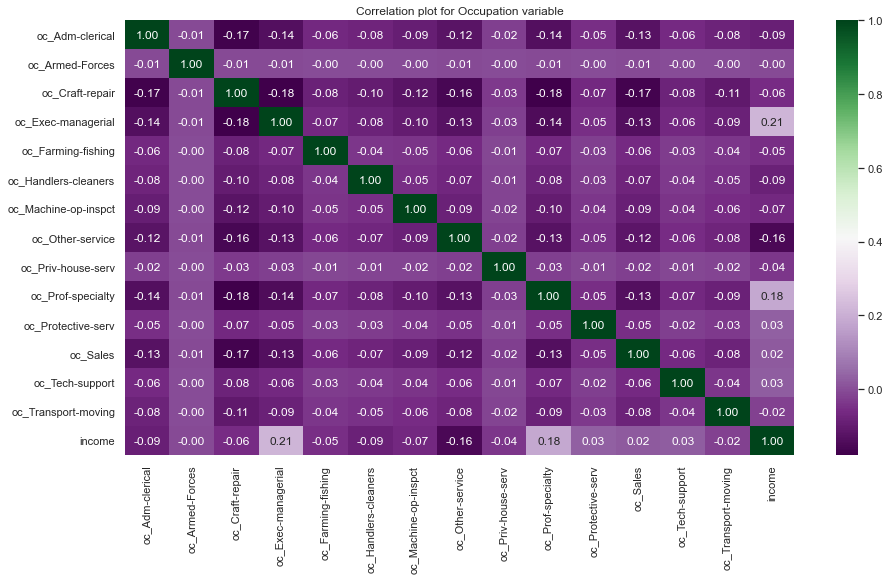

Figure 2.12: Correlation plot for Occupation variable


In [922]:
plt.figure(figsize=(15, 8))
sns.heatmap(df2[['oc_Adm-clerical', 'oc_Armed-Forces', 'oc_Craft-repair', 'oc_Exec-managerial', 'oc_Farming-fishing', 'oc_Handlers-cleaners',
                 'oc_Machine-op-inspct', 'oc_Other-service', 'oc_Priv-house-serv', 'oc_Prof-specialty', 'oc_Protective-serv', 'oc_Sales', 'oc_Tech-support',
                 'oc_Transport-moving', 'income']].corr(method='spearman'), annot=True, fmt='.2f', cmap='PRGn')
plt.title('Correlation plot for Occupation variable')
plt.show()
print('Figure 2.12: Correlation plot for Occupation variable')


Correlation analysis shows that for the target variable, there is no strong correlation with any of the other variables. The maximum absolute values found in the correlation analysis are 0.44 for ms_Married-civ-spouse, 0.4 for re_Husband and 0.32 for education-num variables. All the variables are considered for the machine learning model because there are no prominent variables.

In [923]:
# Separating dependent and independent variables
x2 = df2.drop(columns=['income'])
y2 = df2.income

# Scaling dependent variables using standard scaler
ssc = StandardScaler()
x2 = ssc.fit_transform(x2)

# Separate dataset to train and test sets with 80% to train and 20% to test
x2_train, x2_test, y2_train, y2_test = train_test_split(
    x2, y2, test_size=0.2, random_state=3)


### Machine Learning model to predict whether an individual is going to earn more than $50,000 annually
There are four classification models, Logistic Regression, Support Vector Machine, Random Forest and Gaussian Naive Bayes and two Artificial Neural Network models.

#### Classification models

\
<br>
Classification models are used here as the target variable is categorical variable and the values of the output is known. Five different models were trained and depending of the evaluation of the model using accuracy and output of the confusion matrix, three models is chosen as best model.

##### Logistic Regression
<br>

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4902
           1       0.74      0.60      0.66      1579

    accuracy                           0.85      6481
   macro avg       0.81      0.76      0.78      6481
weighted avg       0.84      0.85      0.84      6481

Figure 2.13: Confusion Matrix for Logistic Regression


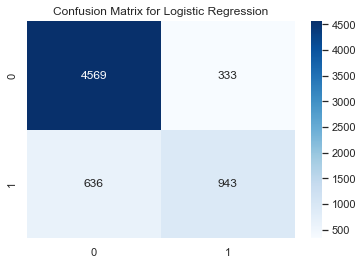

In [924]:
# Initialise the Logistic Regression model
model_lr = LogisticRegression(random_state=0)

# Train the model with training data
model_lr.fit(x2_train, y2_train)

# Predict the Income for test data
pred_lr = model_lr.predict(x2_test)

# Confusion Matrix
matrix = confusion_matrix(y2_test, pred_lr)
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues")

# Performance of the model
print(classification_report(y2_test, pred_lr))
plt.title('Confusion Matrix for Logistic Regression')
print('Figure 2.13: Confusion Matrix for Logistic Regression')


The Logistic Regression model has an accuracy of 0.85, which means that 85% of the sample has been correctly classified.
The F1 score is 0.9 shows that for label zero, classification is performing well. However, for label one, just above average F1 score. High precision of 0.88 and recall of 0.9 shows that a high proportion of class zero values of the output have been identified by the model correctly within the class and between classes. For the class, one scores are a little lower.

##### Support Vector Machine
<br>

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4902
           1       0.74      0.58      0.65      1579

    accuracy                           0.85      6481
   macro avg       0.81      0.75      0.77      6481
weighted avg       0.84      0.85      0.84      6481

Figure 2.14: Confusion Matrix for Supported Vector Machine


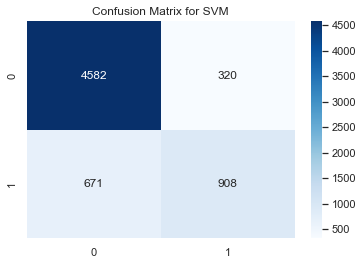

In [925]:
# Initialise the Support Vector Machine
model_svm = svm.SVC(kernel='poly')

# Train the model with training data
model_svm.fit(x2_train, y2_train)

# Predict the Income for test data
pred_svm = model_svm.predict(x2_test)
matrix = confusion_matrix(y2_test, pred_svm)
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues")

# Performance of the model
print(classification_report(y2_test, pred_svm))
plt.title('Confusion Matrix for SVM')
print('Figure 2.14: Confusion Matrix for Supported Vector Machine')


The Supported Vector machine Model has an accuracy of 0.85, which means that 85% of the sample has been correctly classified.
The F1 score is 0.9 shows that for class zero, classification is performing well. However, for label one, just above average F1 score. High precision of 0.87 and recall of 0.93 shows that a high proportion of class zero values of the output have been identified by the model correctly within the class and between classes. For the class, one scores are a little lower. All the model evaluation parameter values are approximately equal to the respective values from Logistic Regression.

##### Random Forest Classifier
<br>

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4902
           1       0.74      0.61      0.67      1579

    accuracy                           0.85      6481
   macro avg       0.81      0.77      0.79      6481
weighted avg       0.85      0.85      0.85      6481

Figure 2.15: Confusion Matrix for Random Forest Classifier


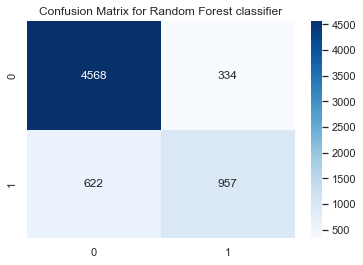

In [926]:
# Initialise the Random Forest Classifier
model_rf = RandomForestClassifier()

# Train the model with training data
model_rf.fit(x2_train, y2_train)

# Predict the Income for test data
pred_rf = model_rf.predict(x2_test)
matrix = confusion_matrix(y2_test, pred_rf)
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues")

# Performance of the model
print(classification_report(y2_test, pred_rf))
plt.title('Confusion Matrix for Random Forest classifier')
print('Figure 2.15: Confusion Matrix for Random Forest Classifier')


The Random Forest classifier has an accuracy of 0.85, which means that 85% of the sample has been correctly classified.
The F1 score is 0.9 shows that for class zero, classification is performing well. However, for label one, just above average F1 score. High precision of 0.88 and recall of 0.93 shows that a high proportion of class zero values of the output have been identified by the model correctly within the class and between classes. For the class, one scores are a little lower. All the model evaluation parameter values are approximately equal to the respective values from Logistic Regression and Supported Vector Machine.

##### Naive Bayes Classifier
<br>

              precision    recall  f1-score   support

           0       0.97      0.40      0.57      4902
           1       0.34      0.97      0.51      1579

    accuracy                           0.54      6481
   macro avg       0.66      0.68      0.54      6481
weighted avg       0.82      0.54      0.56      6481

Figure 2.16: Confusion Matrix for Naive Bayes Classifier


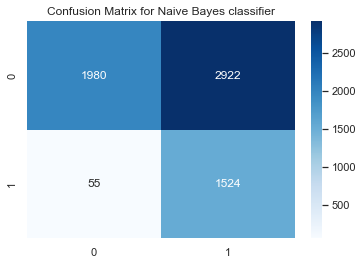

In [927]:
# Initialise the Gaussian Naive Bayes Classifier
model_gnb = GaussianNB()

# Train the model with training data
model_gnb.fit(x2_train, y2_train)

# Predict the Income for test data
pred_gnb = model_gnb.predict(x2_test)
matrix = confusion_matrix(y2_test, pred_gnb)
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues")

# Performance of the model
print(classification_report(y2_test, pred_gnb))
plt.title('Confusion Matrix for Naive Bayes classifier')
print('Figure 2.16: Confusion Matrix for Naive Bayes Classifier')


The Gaussian Naive Bayes Model has an accuracy of 0.54, which means that only 54% of the sample has been correctly classified.
F1 score of 0.57 and 0.51 for class one and zero shows that when considering both output cases, classification only has an average performance. A high value of 0.97 precision shows that the model is performing better for one output label. However, the low value of precision of 0.34 suggests that for the other class, the model is not performing well. The confusion matrix shows there are 2922 wrong classifications for class label zero. The low recall value for class zero and low precision for class one explains the average accuracy of the model.

##### AdaBoost Classifier
<br>

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      4902
           1       0.82      0.44      0.57      1579

    accuracy                           0.84      6481
   macro avg       0.83      0.70      0.74      6481
weighted avg       0.84      0.84      0.82      6481

Figure 2.17: Confusion Matrix for Ada Boost Classifier


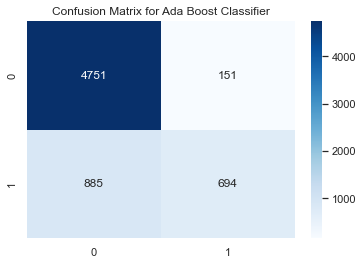

In [928]:
# Initialise the Ada Boost Classifier
model = AdaBoostClassifier(learning_rate=0.15, n_estimators=25)

# Train the model with training data
model.fit(x2_train, y2_train)

# Predict the Income for test data
y_pred = model.predict(x2_test)

# Performance of the model
print(classification_report(y2_test, y_pred))
matrix = confusion_matrix(y2_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix for Ada Boost Classifier')
print('Figure 2.17: Confusion Matrix for Ada Boost Classifier')


The Ada Boost classifier Model has an accuracy of 0.84, which means that only 84% of the sample has been correctly classified.
F1 score of 0.9 for class zero and 0.57 for class one shows that the performance difference in the two classes observed in Logistic regression, SVM and Random Forrest, is the same in this model. A high value of 0.84 and 0.82 for class zero and class one, respectively, shows that the model performs better when identifying the true positives model performes better. However, a low value of recall of 0.34 for class one suggests that the proportion of actual positives is not high.

When comparing classification models, four models are performing well, and one model, the Naive Bayes model, is not performing well for one output label of the target class, reducing the accuracy of that model. F1 score is almost the same for the first three models, Logistic Regression, Supported Vector Machine and Random Forest, fairly good for AdaBoost Classifier. However, the average for the Naive Bayes model. Accuracy is better in Logistic Regression, Random Forest and Supported Vector Machine. The naive Bayes classifier has the highest precision value of .97 for class zero and the highest recall of .97 for class one, even though all the other metrics have low values. Ada Boost classifier also has 0.97 recall for class zero. The Random Forest classier has the highest performance, even though it is only a slight difference from the other two top classifiers.

#### Artificial Neural Network models


\
<br>
Two Artificial Neural Network models have been trained. One with the input layer, two hidden layers, and the output layer. 
And another with the input layer, one hidden layer, and the output layer. Models are also different in the number of nodes in the hidden layers.

##### Artificial Neural Network model one
\
<br>
A model two hidden layers is used here. One hidden layer with 20 nodes, 10 nodes in the other hidden layer, and Relu function as acctivation function for hidden layers and sigmoid function for output layer is used. To compile the model, Adam optimiser, a stochastic gradient descent method, and loss function binary_crossentropy and Accuracy is used to mesure the performance of the model.

In [929]:
# Initialise ANN
model_ann1 = tf.keras.models.Sequential()
# Add two hidden layers
model_ann1.add(tf.keras.layers.Dense(units=20, activation='relu'))
model_ann1.add(tf.keras.layers.Dense(units=10, activation='relu'))
# Add output layer
model_ann1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model_ann1.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ann1.fit(x2_train, y2_train, validation_data=(
    x2_test, y2_test), batch_size=50, epochs=15)
loss, acc = model_ann1.evaluate(x2_test, y2_test)
print('Accuracy: %f' % (acc*100))


Epoch 1/15
519/519 [==============================] - 1s 2ms/step - loss: 0.4015 - accuracy: 0.8053 - val_loss: 0.3272 - val_accuracy: 0.8466
Epoch 2/15
519/519 [==============================] - 1s 1ms/step - loss: 0.3177 - accuracy: 0.8532 - val_loss: 0.3232 - val_accuracy: 0.8496
Epoch 3/15
519/519 [==============================] - 1s 1ms/step - loss: 0.3123 - accuracy: 0.8549 - val_loss: 0.3220 - val_accuracy: 0.8517
Epoch 4/15
519/519 [==============================] - 1s 1ms/step - loss: 0.3094 - accuracy: 0.8565 - val_loss: 0.3232 - val_accuracy: 0.8511
Epoch 5/15
519/519 [==============================] - 1s 2ms/step - loss: 0.3074 - accuracy: 0.8586 - val_loss: 0.3206 - val_accuracy: 0.8491
Epoch 6/15
519/519 [==============================] - 1s 1ms/step - loss: 0.3054 - accuracy: 0.8584 - val_loss: 0.3206 - val_accuracy: 0.8497
Epoch 7/15
519/519 [==============================] - 1s 1ms/step - loss: 0.3039 - accuracy: 0.8602 - val_loss: 0.3208 - val_accuracy: 0.8503
Epoch 

Figure 2.18: Performance of ANN


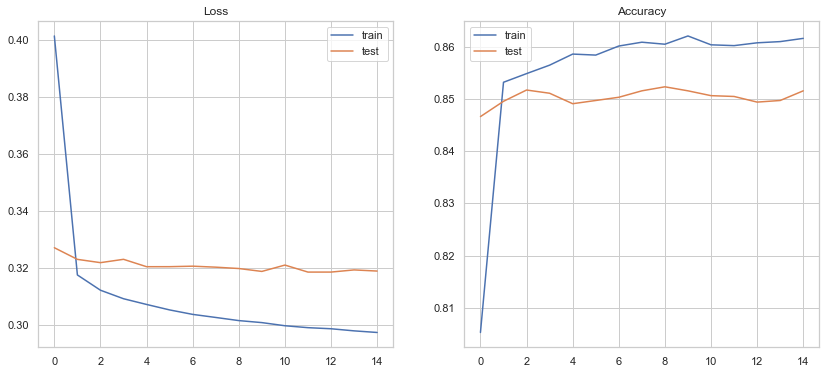

In [930]:
f = plt.figure(figsize=(14, 6))
# Loss graph for train and test data 
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# Accuracy graph for train and test data
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

print('Figure 2.18: Performance of ANN')


##### Artificial Neural Network model two
\
<br>
A model one hidden layers is used here. The hidden layer with 15 nodes, and Relu function as acctivation function for hidden layer and sigmoid function for output layer is used. To compile the model, similar to the ANN model one, Adam optimiser, a stochastic gradient descent method, and loss function binary_crossentropy and Accuracy is used to mesure the performance of the model.

In [931]:
# Initialise ANN
model_ann2 = tf.keras.models.Sequential()
# Add a hidden layer
model_ann2.add(tf.keras.layers.Dense(units=15, activation='relu'))
# Add output layer
model_ann2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model_ann2.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ann2.fit(x2_train, y2_train, validation_data=(
    x2_test, y2_test), batch_size=30, epochs=20)
loss, acc = model_ann2.evaluate(x2_test, y2_test)
print('Accuracy: %f' % (acc*100))


Epoch 1/20
865/865 [==============================] - 1s 1ms/step - loss: 0.3661 - accuracy: 0.8298 - val_loss: 0.3272 - val_accuracy: 0.8465
Epoch 2/20
865/865 [==============================] - 1s 1ms/step - loss: 0.3192 - accuracy: 0.8514 - val_loss: 0.3224 - val_accuracy: 0.8506
Epoch 3/20
865/865 [==============================] - 1s 1ms/step - loss: 0.3143 - accuracy: 0.8531 - val_loss: 0.3197 - val_accuracy: 0.8519
Epoch 4/20
865/865 [==============================] - 1s 1ms/step - loss: 0.3110 - accuracy: 0.8536 - val_loss: 0.3171 - val_accuracy: 0.8531
Epoch 5/20
865/865 [==============================] - 1s 1ms/step - loss: 0.3086 - accuracy: 0.8555 - val_loss: 0.3158 - val_accuracy: 0.8550
Epoch 6/20
865/865 [==============================] - 1s 1ms/step - loss: 0.3068 - accuracy: 0.8566 - val_loss: 0.3157 - val_accuracy: 0.8533
Epoch 7/20
865/865 [==============================] - 1s 1ms/step - loss: 0.3056 - accuracy: 0.8576 - val_loss: 0.3155 - val_accuracy: 0.8545
Epoch 

Figure 2.19: Performance of ANN


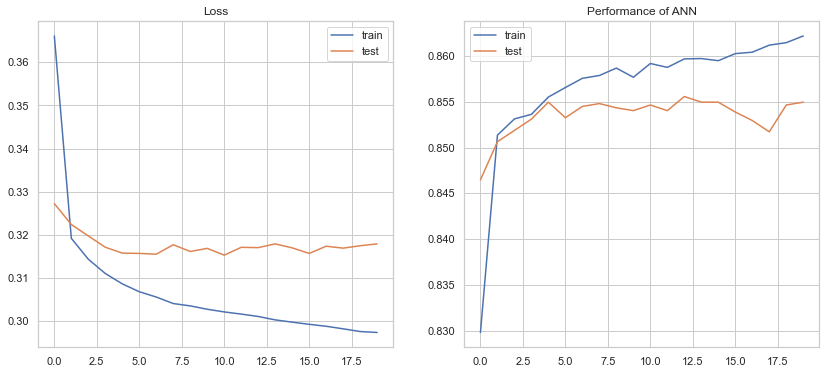

In [932]:
f = plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.title('Performance of ANN')
print('Figure 2.19: Performance of ANN')


Both Artificial Neural Network (ANN) models are performing with an accuracy of 85% to 86%, which can be considered good performance for an ANN model.  The accuracy of the model_ann1 oscillates between 85% and 85.5%.

### Optimisation

- Top three models from the classification are further optimised.

#### Step 1

The First attempt to optimise models is made by dropping low correlated variables from the input data.

In [933]:
# Drop variables with correlation between 0.1 and -0.1 from dataset and select dependent variables
x2 = df2.drop(columns=['income', 'fnlwgt', 're_Other-relative', 'wc_Federal-gov', 'wc_Local-gov', 'wc_Never-worked', 'wc_Self-emp-not-inc', 'wc_State-gov', 'wc_Without-pay',
                       'ms_Married-AF-spouse', 'ms_Married-spouse-absent', 'ms_Separated', 'ms_Widowed', 'country_America', 'country_Asia', 'country_Canada', 'country_Europe', 'country_Other',
                       'country_United-States', 'oc_Adm-clerical', 'oc_Armed-Forces', 'oc_Craft-repair', 'oc_Farming-fishing', 'oc_Handlers-cleaners', 'oc_Machine-op-inspct', 'oc_Priv-house-serv',
                       'oc_Protective-serv', 'oc_Sales', 'oc_Tech-support', 'oc_Transport-moving'])
y = df2.income

# Scaling dependent variables using standard scaler
ssc = StandardScaler()
x2 = ssc.fit_transform(x2)

# Separate dataset to train and test sets with 80% to train and 20% to test
x2_train, x2_test, y2_train, y2_test = train_test_split(
    x2, y2, test_size=0.2, random_state=3)


              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4902
           1       0.74      0.57      0.64      1579

    accuracy                           0.84      6481
   macro avg       0.80      0.75      0.77      6481
weighted avg       0.84      0.84      0.84      6481



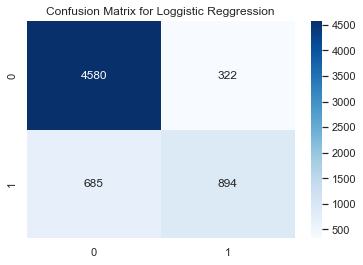

Figure 2.20: Confusion Matrix for Logistic Reggression


In [934]:
# Performance of the Logistic Reggression model after fearute selection
model_lr_1 = LogisticRegression(random_state=0)
model_lr_1.fit(x2_train, y2_train)
pred_lr_op = model_lr_1.predict(x2_test)

print(classification_report(y2_test, pred_lr_op))
matrix = confusion_matrix(y2_test, pred_lr_op)
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix for Loggistic Reggression')
plt.show()

print('Figure 2.20: Confusion Matrix for Logistic Reggression')


              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4902
           1       0.77      0.54      0.63      1579

    accuracy                           0.85      6481
   macro avg       0.81      0.74      0.77      6481
weighted avg       0.84      0.85      0.84      6481



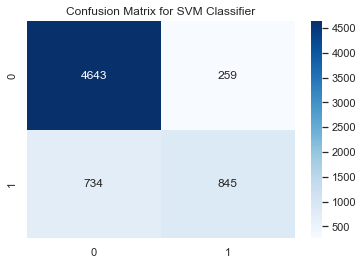

Figure 2.21: Confusion Matrix for SVM Classifier


In [935]:
# Performance of the Support Vector Machine model after fearute selection
model_svm_1 = svm.SVC(kernel='poly')
model_svm_1.fit(x2_train, y2_train)
pred_svm_op = model_svm_1.predict(x2_test)

print(classification_report(y2_test, pred_svm_op))
matrix = confusion_matrix(y2_test, pred_svm_op)
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix for SVM Classifier')
plt.show()
print('Figure 2.21: Confusion Matrix for SVM Classifier')


              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4902
           1       0.72      0.60      0.66      1579

    accuracy                           0.85      6481
   macro avg       0.80      0.76      0.78      6481
weighted avg       0.84      0.85      0.84      6481



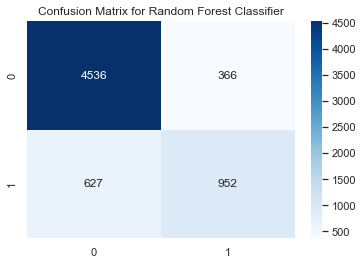

Figure 2.22: Confusion Matrix for Random Forest Classifier


In [936]:
# Performance of the Random Forrest model after fearute selection
model_rf_1 = RandomForestClassifier()
model_rf_1.fit(x2_train, y2_train)
pred_rf_op = model_rf_1.predict(x2_test)

print(classification_report(y2_test, pred_rf_op))
matrix = confusion_matrix(y2_test, pred_rf_op)
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()
print('Figure 2.22: Confusion Matrix for Random Forest Classifier')


In [937]:
# Performance of the ANN model with two hidden layers after fearute selection
# Initialise ANN
model_ann1 = tf.keras.models.Sequential()
# Add two hidden layers
model_ann1.add(tf.keras.layers.Dense(units=20, activation='relu'))
model_ann1.add(tf.keras.layers.Dense(units=10, activation='relu'))
# Add output layer
model_ann1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model_ann1.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ann1.fit(x2_train, y2_train, validation_data=(
    x2_test, y2_test), batch_size=50, epochs=15)
loss, acc = model_ann1.evaluate(x2_test, y2_test)
print('Accuracy: %f' % (acc*100))


Epoch 1/15
519/519 [==============================] - 1s 1ms/step - loss: 0.3873 - accuracy: 0.8195 - val_loss: 0.3328 - val_accuracy: 0.8469
Epoch 2/15
519/519 [==============================] - 1s 1ms/step - loss: 0.3227 - accuracy: 0.8456 - val_loss: 0.3285 - val_accuracy: 0.8446
Epoch 3/15
519/519 [==============================] - 1s 1ms/step - loss: 0.3174 - accuracy: 0.8486 - val_loss: 0.3243 - val_accuracy: 0.8483
Epoch 4/15
519/519 [==============================] - 1s 1ms/step - loss: 0.3145 - accuracy: 0.8506 - val_loss: 0.3252 - val_accuracy: 0.8493
Epoch 5/15
519/519 [==============================] - 1s 1ms/step - loss: 0.3127 - accuracy: 0.8505 - val_loss: 0.3248 - val_accuracy: 0.8479
Epoch 6/15
519/519 [==============================] - 1s 1ms/step - loss: 0.3110 - accuracy: 0.8529 - val_loss: 0.3229 - val_accuracy: 0.8502
Epoch 7/15
519/519 [==============================] - 1s 1ms/step - loss: 0.3095 - accuracy: 0.8531 - val_loss: 0.3230 - val_accuracy: 0.8489
Epoch 

In [938]:
# Performance of the ANN model with one hidden layers after fearute selection
# Initialise ANN
model_ann2 = tf.keras.models.Sequential()
# Add a hidden layer
model_ann2.add(tf.keras.layers.Dense(units=15, activation='relu'))
# Add output layer
model_ann2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model_ann2.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ann2.fit(x2_train, y2_train, validation_data=(
    x2_test, y2_test), batch_size=30, epochs=20)
loss, acc = model_ann2.evaluate(x2_test, y2_test)
print('Accuracy: %f' % (acc*100))


Epoch 1/20
865/865 [==============================] - 1s 1ms/step - loss: 0.3803 - accuracy: 0.8212 - val_loss: 0.3291 - val_accuracy: 0.8508
Epoch 2/20
865/865 [==============================] - 1s 1ms/step - loss: 0.3216 - accuracy: 0.8488 - val_loss: 0.3241 - val_accuracy: 0.8514
Epoch 3/20
865/865 [==============================] - 1s 1ms/step - loss: 0.3176 - accuracy: 0.8494 - val_loss: 0.3232 - val_accuracy: 0.8514
Epoch 4/20
865/865 [==============================] - 1s 1ms/step - loss: 0.3155 - accuracy: 0.8496 - val_loss: 0.3218 - val_accuracy: 0.8502
Epoch 5/20
865/865 [==============================] - 1s 1ms/step - loss: 0.3140 - accuracy: 0.8498 - val_loss: 0.3225 - val_accuracy: 0.8511
Epoch 6/20
865/865 [==============================] - 1s 1ms/step - loss: 0.3130 - accuracy: 0.8502 - val_loss: 0.3221 - val_accuracy: 0.8503
Epoch 7/20
865/865 [==============================] - 1s 1ms/step - loss: 0.3120 - accuracy: 0.8517 - val_loss: 0.3233 - val_accuracy: 0.8503
Epoch 

This step did not increase the performance of the models, and for Random Forest and ANN models, it decreased the accuracy slightly. Therefore, this step is not carried forward. All the features are used in the model training.

#### Step 2

Different scaling methods are used to transform data to check whether the performance can be increased.

In [939]:
# RobustScaler, MinMaxScaler,Normalizer was tried
#x2 = StandardScaler().fit_transform(x2)
#x2 = MinMaxScaler().fit_transform(x2)
#x2 =  Normalizer().fit_transform(x2)

# Scaling dependent variables using minmax scaler
x2 = MinMaxScaler().fit_transform(x2)

# Separate dataset to train and test sets with 80% to train and 20% to test
x2_train, x2_test, y2_train, y2_test = train_test_split(
    x2, y2, test_size=0.2, random_state=3)


              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4902
           1       0.74      0.56      0.64      1579

    accuracy                           0.84      6481
   macro avg       0.80      0.75      0.77      6481
weighted avg       0.84      0.84      0.84      6481

Figure 2.23: Confusion Matrix for Logistic Reggression Classifier


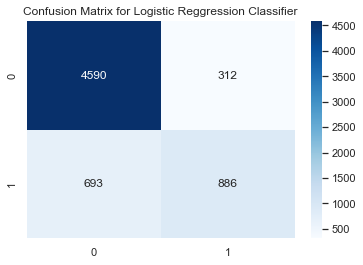

In [940]:
# Performance of the Logistic Reggression model with different scalers
model_lr = LogisticRegression(random_state=0, max_iter=1000)
model_lr.fit(x2_train, y2_train)
pred_lr_op = model_lr.predict(x2_test)

print(classification_report(y2_test, pred_lr_op))
matrix = confusion_matrix(y2_test, pred_lr_op)
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix for Logistic Reggression Classifier')
print('Figure 2.23: Confusion Matrix for Logistic Reggression Classifier')


              precision    recall  f1-score   support

           0       0.86      0.95      0.91      4902
           1       0.78      0.52      0.63      1579

    accuracy                           0.85      6481
   macro avg       0.82      0.74      0.77      6481
weighted avg       0.84      0.85      0.84      6481

Figure 2.24: Confusion Matrix for SVM Classifier


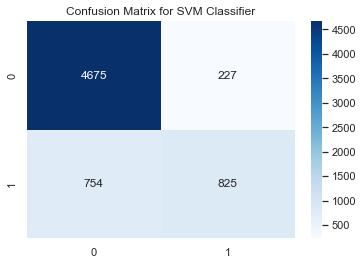

In [941]:
# Performance of the Support Vector Machine model with different scalers
model_svm = svm.SVC(kernel='poly')
model_svm.fit(x2_train, y2_train)
pred_svm_op = model_svm.predict(x2_test)

print(classification_report(y2_test, pred_svm_op))
matrix = confusion_matrix(y2_test, pred_svm_op)
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix for SVM Classifier')
print('Figure 2.24: Confusion Matrix for SVM Classifier')


              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4902
           1       0.71      0.60      0.65      1579

    accuracy                           0.84      6481
   macro avg       0.80      0.76      0.78      6481
weighted avg       0.84      0.84      0.84      6481

Figure 2.25: Confusion Matrix for Random Forest Classifier


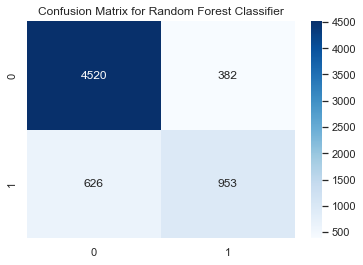

In [942]:
# Performance of the Random Classifier model with different scalers
model_rf = RandomForestClassifier()
model_rf.fit(x2_train, y2_train)
pred_rf_op = model_rf.predict(x2_test)

print(classification_report(y2_test, pred_rf_op))
matrix = confusion_matrix(y2_test, pred_rf_op)
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix for Random Forest Classifier')
print('Figure 2.25: Confusion Matrix for Random Forest Classifier')


In [943]:
# Performance of the ANN model one with different scalers
# Initialise ANN
model_ann1 = tf.keras.models.Sequential()
# Add two hidden layers
model_ann1.add(tf.keras.layers.Dense(units=20, activation='relu'))
model_ann1.add(tf.keras.layers.Dense(units=10, activation='relu'))
# Add output layer
model_ann1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model_ann1.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ann1.fit(x2_train, y2_train, validation_data=(
    x2_test, y2_test), batch_size=50, epochs=15)
loss, acc = model_ann1.evaluate(x2_test, y2_test)
print('Accuracy: %f' % (acc*100))


Epoch 1/15
519/519 [==============================] - 1s 1ms/step - loss: 0.4155 - accuracy: 0.8023 - val_loss: 0.3723 - val_accuracy: 0.8331
Epoch 2/15
519/519 [==============================] - 1s 2ms/step - loss: 0.3505 - accuracy: 0.8372 - val_loss: 0.3463 - val_accuracy: 0.8432
Epoch 3/15
519/519 [==============================] - 1s 2ms/step - loss: 0.3353 - accuracy: 0.8446 - val_loss: 0.3351 - val_accuracy: 0.8468
Epoch 4/15
519/519 [==============================] - 1s 2ms/step - loss: 0.3305 - accuracy: 0.8459 - val_loss: 0.3324 - val_accuracy: 0.8463
Epoch 5/15
519/519 [==============================] - 1s 2ms/step - loss: 0.3268 - accuracy: 0.8462 - val_loss: 0.3344 - val_accuracy: 0.8496
Epoch 6/15
519/519 [==============================] - 1s 2ms/step - loss: 0.3255 - accuracy: 0.8477 - val_loss: 0.3322 - val_accuracy: 0.8446
Epoch 7/15
519/519 [==============================] - 1s 3ms/step - loss: 0.3241 - accuracy: 0.8470 - val_loss: 0.3308 - val_accuracy: 0.8434
Epoch 

In [944]:
# Performance of the ANN model two with different scalers
# Initialise ANN
model_ann2 = tf.keras.models.Sequential()
# Add a hidden layer
model_ann2.add(tf.keras.layers.Dense(units=15, activation='relu'))
# Add output layer
model_ann2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model_ann2.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ann2.fit(x2_train, y2_train, validation_data=(
    x2_test, y2_test), batch_size=30, epochs=20)
loss, acc = model_ann2.evaluate(x2_test, y2_test)
print('Accuracy: %f' % (acc*100))


Epoch 1/20
865/865 [==============================] - 2s 2ms/step - loss: 0.4251 - accuracy: 0.7854 - val_loss: 0.3894 - val_accuracy: 0.8222
Epoch 2/20
865/865 [==============================] - 1s 1ms/step - loss: 0.3703 - accuracy: 0.8264 - val_loss: 0.3624 - val_accuracy: 0.8395
Epoch 3/20
865/865 [==============================] - 1s 1ms/step - loss: 0.3502 - accuracy: 0.8368 - val_loss: 0.3452 - val_accuracy: 0.8472
Epoch 4/20
865/865 [==============================] - 1s 1ms/step - loss: 0.3393 - accuracy: 0.8405 - val_loss: 0.3397 - val_accuracy: 0.8488
Epoch 5/20
865/865 [==============================] - 1s 1ms/step - loss: 0.3337 - accuracy: 0.8439 - val_loss: 0.3362 - val_accuracy: 0.8472
Epoch 6/20
865/865 [==============================] - 1s 1ms/step - loss: 0.3303 - accuracy: 0.8462 - val_loss: 0.3321 - val_accuracy: 0.8454
Epoch 7/20
865/865 [==============================] - 1s 1ms/step - loss: 0.3280 - accuracy: 0.8474 - val_loss: 0.3313 - val_accuracy: 0.8454
Epoch 

In this step, it is clear the initial data transform method, Standard Scaler, is the best way to scale data as other scaling methods did not increase performance. Moreover, some scaling methods have decreased model performance.

#### Step 3  Hyper parameter tuning
\
<br>

The exhaustive search method Grid Search is used to find the best parameters for an estimator from the specified parameter values. These parameters are defined in the model and not directly learnt with the estimator. Here Grid Search is used to avoid missing out on any good values from the specified parameters. In the GridSearchCV, cross-validation is also used to find the best values from the parameter grid.


#### Tuning the hyper-parameters of Logistic Regression

\
\
For Penalty, l1, l2, and a combination of the two methods, elastic-net is used as parameters. Solvers lbfgs, newton-CG, sag, saga, and liblinear is used with supported penalty methods.
Max iter values 1000 and 200, tolerance values of 0.001 and 0.01 and C values of 2, 4 and 5 are used to make the parameter space.

In [945]:
# Separating dependent and independent variables
x2 = df2.drop(columns=['income'])
y2 = df2.income

# Scaling dependent variables using standard scaler
x2 = StandardScaler().fit_transform(x2)

# Separate dataset to train and test sets with 80% to train and 20% to test
x2_train, x2_test, y2_train, y2_test = train_test_split(
    x2, y2, test_size=0.2, random_state=3)


In [946]:
# For Logistic reggression, depending on the supported solvers for penalty parameter, different set of parameter grids are defined
param_grid = [
    {'penalty': ['l2'],
     'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
     'max_iter': [1000, 2000],
     'tol':[0.001, 0.01],
     'C':[2.0, 4.0, 0.5]
     },
    {'penalty': ['l1'],
     'solver': ['saga', 'liblinear'],
     'max_iter': [1000, 2000],
     'tol':[0.001, 0.01],
     'C':[2.0, 4.0, 0.5]
     },
    {'penalty': ['elasticnet'],
     'solver': ['saga'],
     'max_iter': [1000, 2000],
     'tol':[0.001, 0.01],
     'C':[2.0, 4.0, 5.0, ]
     }
]
clf = GridSearchCV(estimator=model_lr, param_grid=param_grid)
best_model = clf.fit(x2_train, y2_train)
print('The best score across ALL searched params:\n', best_model.best_score_)
print('The best parameters across ALL searched params:\n', best_model.best_params_)


The best score across ALL searched params:
 0.8514716894650999
The best parameters across ALL searched params:
 {'C': 0.5, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.01}


In [947]:
# Accuracy of the best performed model with test data
best_predicted_values = best_model.predict(x2_test)
accuracy_score(best_predicted_values, y2_test)


0.8503317389291776

The accuracy of the Logistic regression is not improved after hyper-parameter tuning. The default parameters also have the same accuracy of 85% as the best model.

#### Tuning the hyper-parameters of Suported Vector Machine 

\
\
Here, linear, rbf and poly kernels and C values of 1 and 10 are used to make the parameter grid.

In [948]:
# Parameters for Support Vector Machine
parameters = {'kernel': ('linear', 'rbf'), 'C': [1, 10]}
svc = svm.SVC()

# Run the grid search
clf = GridSearchCV(estimator=svc, param_grid=parameters)
best_model = clf.fit(x2_train, y2_train)
print('The best score across ALL searched params:\n', clf.best_score_)
print('The best parameters across ALL searched params:\n', clf.best_params_)


The best score across ALL searched params:
 0.8523207004416825
The best parameters across ALL searched params:
 {'C': 1, 'kernel': 'rbf'}


In [949]:
# Accuracy of the best performed model with test data
best_predicted_values = best_model.predict(x2_test)
accuracy_score(best_predicted_values, y2_test)


0.852029007869156

Similar to Logistic Regression, the Supported vector machine also achieved higher accuracy after hyper-parameter tuning.

#### Tuning the hyper-parameters of Random Forest Classifier

\
\
The number of estimators, Selection criterion Gini and entropy, and different values of max depth and minimum sample split is used to make the parameter grid.

In [950]:
# Parameters for Random Forest Classifier
parameters = {
    'n_estimators': [50, 100, 300, 400],
    'criterion': ['entropy', 'gini'],
    'max_depth': [30, 40, 50],
    'min_samples_split': [20, 25, 50]
}

# Run the grid search
grid_obj = GridSearchCV(estimator=model_rf, param_grid=parameters)
grid_obj = grid_obj.fit(x2_train, y2_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets
clf.fit(x2_train, y2_train)

print('The best score across ALL searched params:\n', grid_obj.best_score_)
print('The best parameters across ALL searched params:\n', grid_obj.best_params_)


The best score across ALL searched params:
 0.8654761405169232
The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 25, 'n_estimators': 100}


In [951]:
# Accuracy of the best performed model with test data
best_predicted_values = clf.predict(x2_test)
accuracy_score(best_predicted_values, y2_test)


0.8645270791544515

The Random Forest model has improved its accuracy after the hyper-parameter tuning from 85 to 86.

#### Manual hyper-parameters tuning the for Artificial Neural Network Models

In [952]:
# Initialise ANN
model_ann1 = tf.keras.models.Sequential()
# Add two hidden layers
model_ann1.add(tf.keras.layers.Dense(units=35, activation='softmax'))
model_ann1.add(tf.keras.layers.Dropout(.1, input_shape=(2,)))
# Add output layer
model_ann1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model_ann1.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ann1.fit(x2_train, y2_train, validation_data=(
    x2_test, y2_test), batch_size=50, epochs=15)
loss, acc = model_ann1.evaluate(x2_test, y2_test)
print('Accuracy: %f' % (acc*100))


Epoch 1/15
519/519 [==============================] - 1s 1ms/step - loss: 0.5583 - accuracy: 0.7684 - val_loss: 0.4655 - val_accuracy: 0.8364
Epoch 2/15
519/519 [==============================] - 1s 1ms/step - loss: 0.4228 - accuracy: 0.8383 - val_loss: 0.3937 - val_accuracy: 0.8477
Epoch 3/15
519/519 [==============================] - 1s 1ms/step - loss: 0.3796 - accuracy: 0.8431 - val_loss: 0.3661 - val_accuracy: 0.8517
Epoch 4/15
519/519 [==============================] - 1s 1ms/step - loss: 0.3587 - accuracy: 0.8463 - val_loss: 0.3522 - val_accuracy: 0.8526
Epoch 5/15
519/519 [==============================] - 1s 1ms/step - loss: 0.3499 - accuracy: 0.8465 - val_loss: 0.3445 - val_accuracy: 0.8514
Epoch 6/15
519/519 [==============================] - 1s 1ms/step - loss: 0.3433 - accuracy: 0.8463 - val_loss: 0.3385 - val_accuracy: 0.8514
Epoch 7/15
519/519 [==============================] - 1s 1ms/step - loss: 0.3392 - accuracy: 0.8458 - val_loss: 0.3357 - val_accuracy: 0.8514
Epoch 

##### Results

- Using different optimisers resulted accuracy:
    -   sgd ~ 75
    -   Adadelta ~ 67 
    -   Ftrl ~ 75
    -   Nadam ~ 85
- Using tanh, selu, and exponential activation functions resutled accuracy around 85


| Try | Layer 1 | Layer 2 | Accuracy|
| --- | --- | --- | --- |
| 1 | units=15 <br> activation = relu | units=5 <br> activation = relu |85.0| 
| 2 | units=25 <br> activation = relu | units=15 <br> activation = relu |85.1 |
| 3 | units=30 <br> activation = relu | units=10 <br> activation = relu |85.1 |
| 4 | units=30 <br> activation = softmax | units=10 <br> activation = softmax |85.3 |
| 5 | units=35 <br> activation = softmax | units=15 <br> activation = softmax |85.4 |
| 6 | units=35 <br> activation = softmax | units=10 <br> activation = softmax |85.7| 
| 7 | units=35 <br> activation = softmax | units=10 <br> activation = softmax |85.7 |

All the different parameter changes only incresed accuracy slightly for this model. Even one layer changing to **dropout** layer did not help to increase accuracy.

In [953]:
# Initialise ANN
model_ann2 = tf.keras.models.Sequential()
# Add a hidden layer
model_ann2.add(tf.keras.layers.Dense(units=35, activation='softmax'))
# Add output layer
model_ann2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model_ann2.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ann2.fit(x2_train, y2_train, validation_data=(
    x2_test, y2_test), batch_size=25, epochs=20)
loss, acc = model_ann2.evaluate(x2_test, y2_test)
print('Accuracy: %f' % (acc*100))


Epoch 1/20
1037/1037 [==============================] - 2s 1ms/step - loss: 0.4910 - accuracy: 0.7933 - val_loss: 0.3936 - val_accuracy: 0.8472
Epoch 2/20
1037/1037 [==============================] - 1s 1ms/step - loss: 0.3619 - accuracy: 0.8489 - val_loss: 0.3525 - val_accuracy: 0.8522
Epoch 3/20
1037/1037 [==============================] - 1s 1ms/step - loss: 0.3369 - accuracy: 0.8526 - val_loss: 0.3413 - val_accuracy: 0.8519
Epoch 4/20
1037/1037 [==============================] - 1s 1ms/step - loss: 0.3262 - accuracy: 0.8546 - val_loss: 0.3346 - val_accuracy: 0.8520
Epoch 5/20
1037/1037 [==============================] - 1s 1ms/step - loss: 0.3197 - accuracy: 0.8549 - val_loss: 0.3298 - val_accuracy: 0.8534
Epoch 6/20
1037/1037 [==============================] - 1s 1ms/step - loss: 0.3151 - accuracy: 0.8567 - val_loss: 0.3275 - val_accuracy: 0.8533
Epoch 7/20
1037/1037 [==============================] - 1s 1ms/step - loss: 0.3118 - accuracy: 0.8578 - val_loss: 0.3262 - val_accuracy:

##### Results

- Using different optimisers resulted accuracy:
    -   sgd ~ 85
    -   Adadelta ~ 72 
    -   Ftrl ~ 85
    -   Nadam ~ 85
- Using tanh, selu, and exponential activation functions resutled accuracy around 83 ~ 85


| Try | Layer 1 |  Accuracy|
| --- | --- | --- | 
| 1 | units=15 <br> activation = relu |85.0 |
| 2 | units=25 <br> activation = relu  |85.3| 
| 3 | units=30 <br> activation = relu  |85.1 |
| 4 | units=30 <br> activation = softmax  |85.3 |
| 5 | units=35 <br> activation = softmax |85.3 |
| 6 | units=25 <br> activation = softmax  |85.4|

All the different parameter changes only incresed accuracy slightly for this model

### Conclusion


Five classification models and two Artificial Neural Network models were used to predict individuals' annual income based on US census data. Then the first three classification models and two ANN models were chosen based on the performance of predicting data to further tuning. Those five selected models are further tuned using feature selection, different methods of data cleaning and hyperparameter tuning. The highest accuracy is 86% from the Random Forest Classifier. Most of the other models also performed around 85% at their best. The low performance of class one is observed for most of the classification models. This could result from the unbalanced observations for target classes.

Artificial Neural Network models has accuracy around 85% and did not show a difference in accuracy when changing the input features, data transformation or even with the different number of hidden layers. The only difference observed is from hyperparameter testing, where for some optimisers, accuracy was reduced to seventies or sixties.

Overall, there is no significant difference when considering the best performance for the top five models. However, the Random Forest Classifier is more accurate in predicting if an individual gets an annual income of $50000 or more. The Random Forest model is robust to outliers, and it has shown unchanging accuracy of over 85% despite changes to the model parameters, scaling methods and feature selection. In comparison, other models had an accuracy range from ~50% to 85%.

***

## Referencese 

NHS (2022), Understanding your health and weight: Body mass index (BMI). Available at: https://www.nhsinform.scot/healthy-living/food-and-nutrition/healthy-eating-and-weight-loss/understanding-your-health-and-weight-body-mass-index-bmi (July 18, 2022).

scikit-learn (2022), 6.3. Preprocessing data. Available at: https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data(July 20, 2022). 

pandas (2022), pandas.get_dummies. Available at: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html (July 8, 2022). 

matplotlib (2022),Choosing Colormaps in Matplotlib. Available at: https://matplotlib.org/stable/tutorials/colors/colormaps.html (July 15, 2022). 

scikit-learn (2022), sklearn.preprocessing.LabelEncoder. Available at:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html (July 10, 2022). 

scikit-learn (2022), sklearn.linear_model.LogisticRegression. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression(July 15, 2022). 

scikit-learn (2022), sklearn.svm.SVC. Available at:https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html(July 15, 2022). 

scikit-learn (2022),sklearn.ensemble.RandomForestClassifier. Available at:https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html(July 15, 2022). 

scikit-learn (2022), sklearn.ensemble.AdaBoostClassifier. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html(July 15, 2022). 

scikit-learn (2022), 1.9. Naive Bayes. Available at:https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes(July 15, 2022). 

scikit-learn (2022) 3.3.2. Classification metrics. Available at: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics(July 15, 2022)

scikit-learn (2022), sklearn.model_selection.GridSearchCV. Available at:  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
(July 21, 2022).

Keras(2022),Keras API reference. Available at: https://keras.io/api/(July 22, 2022) 